### **All Libraries**

In [4]:
# Data Handling
import pandas as pd

# Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Training & Splitting
from sklearn.model_selection import train_test_split

# Models
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.metrics import confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Timing Execution
import time


### **Preparation du fichier / Analyse**

In [33]:
import pandas as pd

# Load the TSV file with UTF-8 encoding
df = pd.read_csv('LABR_RAW.csv', encoding='utf-8')

# Rename the columns
df.columns = ["Label", "Column1", "Column2", "Column3","Text"]

# Keep only the 'Text' and 'Label' columns
df = df[['Label','Text']]

In [34]:
# Find the number of duplicate rows based on the 'Text' column
duplicates_count = df.duplicated(subset="Text").sum()

# Remove duplicate rows based on the 'Text' column
df = df.drop_duplicates(subset="Text", keep="first")

# Print the results
print(f"{duplicates_count} duplicate rows were deleted.")

3167 duplicate rows were deleted.


Sentiment Distribution:
 Label
5    22404
4    18124
3    11680
2     5056
1     2825
Name: count, dtype: int64


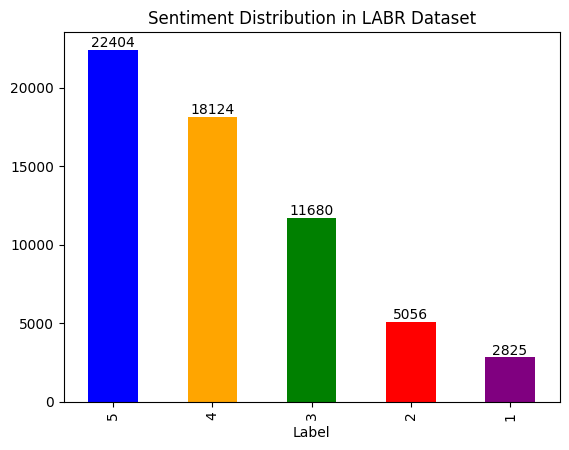

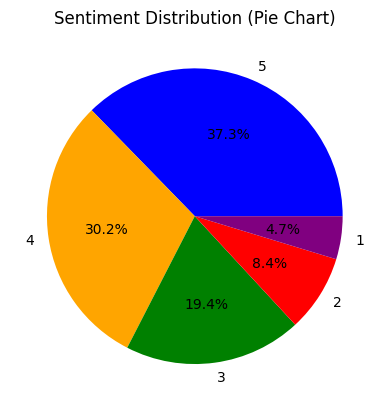

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Count sentiment occurrences
sentiment_counts = df["Label"].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Define a list of colors for the 5 ratings
colors = ["blue", "orange", "green", "red", "purple"]

# Bar Chart
ax = sentiment_counts.plot(kind="bar", color=colors)
plt.title("Sentiment Distribution in LABR Dataset")

# Add the exact number on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)  # Adjust vertical position (v + 0.05) if needed

#plt.savefig("bar_chart.png")
plt.show()

# Pie Chart
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=colors)
plt.title("Sentiment Distribution (Pie Chart)")
plt.ylabel("")
#plt.savefig("pie_chart.png")
print("\n")
plt.show()


In [36]:
# Filter out rows with ratings 3
df = df[df["Label"].isin([1, 2, 4, 5])]

# Rename the ratings
df["Label"] = df["Label"].replace({5: "POS", 4:"POS", 1: "NEG", 2: "NEG"})

<ipython-input-36-0845cd27fa88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Label"] = df["Label"].replace({5: "POS", 4:"POS", 1: "NEG", 2: "NEG"})


Sentiment Distribution:
 Label
POS    40528
NEG     7881
Name: count, dtype: int64


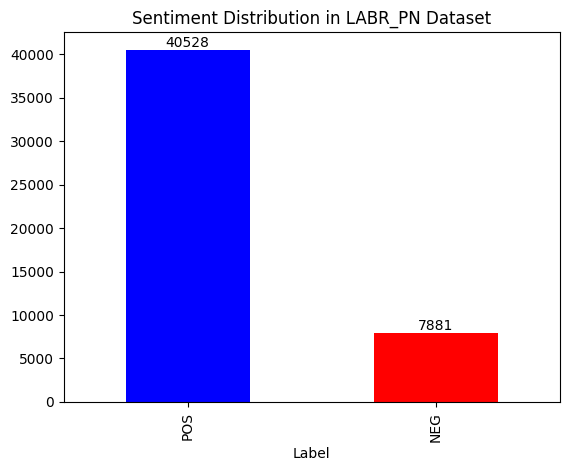

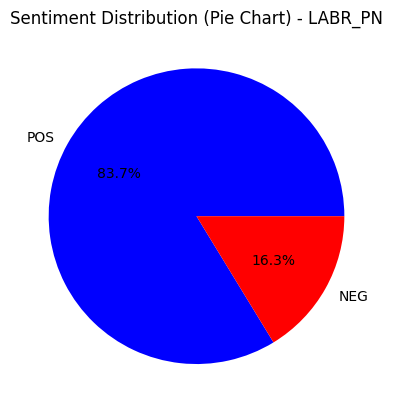

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Count sentiment occurrences
sentiment_counts = df["Label"].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Define colors for the 2 ratings
colors = ["blue", "red"]

# Bar Chart
ax = sentiment_counts.plot(kind="bar", color=colors)
plt.title("Sentiment Distribution in LABR_PN Dataset")

# Add the exact number on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)  # Adjust vertical position if needed

#plt.savefig("bar_chart_pn.png")
plt.show()

# Pie Chart
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=colors)
plt.title("Sentiment Distribution (Pie Chart) - LABR_PN")
plt.ylabel("")
#plt.savefig("pie_chart_pn.png")
print("\n")
plt.show()


In [38]:
# Replace POS with 1 and NEG with 0 in the 'Label' column
df["Label"] = df["Label"].replace({"POS": 1, "NEG": 0})

# Save the new dataset
df.to_csv("LABR.csv", index=False, encoding="utf-8")

print("Updated dataset saved as LABR.csv")


<ipython-input-38-294788dac904>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Label"] = df["Label"].replace({"POS": 1, "NEG": 0})


Updated dataset saved as LABR.csv


### **Pretraitement**

In [39]:
import pandas as pd
import string
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.isri import ISRIStemmer
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
def remove_non_arabic(text):
    if isinstance(text, str):
        return re.sub(r'[^\u0620-\u064A\s]', ' ', text)
    return ''

def tokenization(text):
    if isinstance(text, str):
        return re.findall(r'\S+', text)  # Matches sequences of non-space characters
    return []

def remove_arabic_stopwords(tokens):
    arabic_stopwords = set(stopwords.words("arabic"))  # Convert to set for faster lookup
    return [token for token in tokens if token not in arabic_stopwords]

def get_root(word, stemmer):
    if isinstance(word, str):
        return stemmer.stem(word)
    return word

def stemming_AR(tokens):
    stemmer = ISRIStemmer()
    return [get_root(token, stemmer) for token in tokens]

def rejoin_tokens(tokens):
    filtered_tokens = [token for token in tokens if isinstance(token, str) and token.strip()]
    return ' '.join(filtered_tokens)

In [41]:
def LABR_pretraitement(text):
    if isinstance(text, str):

        # Step 1: Remove non-arabic characters
        text = remove_non_arabic(text)

        # Step 2: Tokenization (split text into tokens)
        tokens = tokenization(text)

        # Step 3: Remove Arabic stopwords
        tokens = remove_arabic_stopwords(tokens)

        # Step 4: Apply stemming (ISRI Stemmer for Arabic)
        tokens = stemming_AR(tokens)

        # Step 5: Rejoin tokens into a single string
        return rejoin_tokens(tokens)

    return ''

In [42]:
print(f"Start processing LABR ...\n")
LABR = pd.read_csv("/content/LABR.csv")
LABR["Text"] = [LABR_pretraitement(text) for text in df["Text"]]
LABR.to_csv("/content/LABR_Pre.csv", index=False)
print(f"Finished processing LABR!\n")

Start processing LABR ...

Finished processing LABR!



In [43]:
from sklearn.utils import resample
import pandas as pd

# Load your original dataset
df = pd.read_csv('LABR_Pre.csv', encoding='utf-8-sig')

# Drop NaNs
df = df.dropna(subset=['Text']).reset_index(drop=True)

# Separate classes
df_majority = df[df['Label'] == 1]
df_minority = df[df['Label'] == 0]

# Oversample minority
df_minority_oversampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

# Combine and shuffle
df_balanced = pd.concat([df_majority, df_minority_oversampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
df_balanced.to_csv('LABR_Pre_Blc.csv', index=False, encoding='utf-8-sig')

print("Balanced text data saved to 'balanced_text_data.csv'")

Balanced text data saved to 'balanced_text_data.csv'


### **Balancing**

In [44]:
from sklearn.utils import resample
import pandas as pd

# Load your original dataset
df = pd.read_csv('LABR_Pre.csv', encoding='utf-8-sig')

# Drop NaNs
df = df.dropna(subset=['Text']).reset_index(drop=True)

# Separate classes
df_majority = df[df['Label'] == 1]
df_minority = df[df['Label'] == 0]

# Oversample minority
df_minority_oversampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

# Combine and shuffle
df_balanced = pd.concat([df_majority, df_minority_oversampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
df_balanced.to_csv('LABR_Pre_Blc.csv', index=False, encoding='utf-8-sig')

print("Balanced text data saved to 'balanced_text_data.csv'")

Balanced text data saved to 'balanced_text_data.csv'


### **Visualisation / Metrics**

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_results(confusion_matrix, y_test, y_pred, dataset_name, algorithm_name, execution_time, num_positive, num_negative):
    TN = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]

    epsilon = 1e-10
    accuracy = (TP + TN) / (TP + TN + FP + FN + epsilon)

    # Per-class metrics
    precision_per_class = precision_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    recall_per_class = recall_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    f1_per_class = f1_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    support_0 = sum(y_test == 0)
    support_1 = sum(y_test == 1)

    # Prepare result dict (optional to return it)
    results = {
        "Confusion Matrix": confusion_matrix,
        "Accuracy": round(accuracy, 4),
        "Precision_0": round(precision_per_class[0], 4),
        "Recall_0": round(recall_per_class[0], 4),
        "F1_0": round(f1_per_class[0], 4),
        "Support_0": support_0,
        "Precision_1": round(precision_per_class[1], 4),
        "Recall_1": round(recall_per_class[1], 4),
        "F1_1": round(f1_per_class[1], 4),
        "Support_1": support_1,
        "Number of Positive Samples": num_positive,
        "Number of Negative Samples": num_negative,
        "Dataset": dataset_name,
        "Algorithm": algorithm_name,
        "Execution Time (s)": round(execution_time, 4)
    }

    # --- Visualization ---
    title = f"{dataset_name} with {algorithm_name}"
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6), gridspec_kw={'width_ratios': [1, 1.1]})
    fig.suptitle(title, fontsize=14, fontweight='bold')

    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1,
                square=True, linewidths=0, linecolor='white')
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')
    ax1.set_title('Confusion Matrix', fontsize=12)
    ax1.set_xticklabels(['Negative', 'Positive'])
    ax1.set_yticklabels(['Negative', 'Positive'])

    ax2.axis('off')
    ax2.set_title('Statistics Summary', fontsize=12, fontweight='bold', loc='left')

    stats_text = [
        f"Accuracy: {results['Accuracy']}",
        f"Execution Time: {execution_time:.2f} sec",
        f"Training Positives: {num_positive}",
        f"Training Negatives: {num_negative}"
    ]
    y_text = 0.95
    for line in stats_text:
        ax2.text(0.01, y_text, line, fontsize=11, va='top')
        y_text -= 0.07

    col_labels = ['Precision', 'Recall', 'F1 Score', 'Support']
    row_labels = ['Class 0 (Neg)', 'Class 1 (Pos)']
    cell_data = [
        [results['Precision_0'], results['Recall_0'], results['F1_0'], results['Support_0']],
        [results['Precision_1'], results['Recall_1'], results['F1_1'], results['Support_1']]
    ]
    table = ax2.table(
        cellText=cell_data,
        rowLabels=row_labels,
        colLabels=col_labels,
        cellLoc='center',
        colLoc='center',
        loc='center',
        bbox=[0.01, 0.05, 0.9, 0.3]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(0.95, 1.0)

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

    return results


### **Traitement**

In [73]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

def run_model_on_csv(csv_path, model_class, model_name, dataset_name, sample_percentage=1.0, model_params=None):
    # Load Dataset
    df = pd.read_csv(csv_path, encoding='utf-8-sig')
    df = df[df['Text'].notna() & (df['Text'] != "")]

    if sample_percentage < 1.0:
        df = df.sample(frac=sample_percentage, random_state=42).reset_index(drop=True)

    X = df['Text']
    y = df['Label']

    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Create and Train Model
    model = model_class(**(model_params or {}))  # if model_params is None → use default
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    execution_time = time.time() - start_time

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Metrics
    results = analyze_and_visualize_results(
        confusion_matrix=cm,
        y_test=y_test,
        y_pred=y_pred,
        dataset_name=dataset_name,
        algorithm_name=model_name,
        execution_time=execution_time,
        num_positive=len(df[df['Label'] == 1]),
        num_negative=len(df[df['Label'] == 0])
    )


    return results


### **Hyper Parameter Testing Function (two datasets)**

In [166]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import time

def test_model_with_param_two_datasets(csv_path1, csv_path2, model_class, param_name, param_values, labels=("D1", "D2"), sample_percentage=1.0):
    def process_dataset(csv_path):
        df = pd.read_csv(csv_path, encoding='utf-8-sig')
        df = df[df['Text'].notna() & (df['Text'] != "")]

        if sample_percentage < 1.0:
            df = df.sample(frac=sample_percentage, random_state=42).reset_index(drop=True)

        X = df['Text']
        y = df['Label']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        vectorizer = TfidfVectorizer()
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)

        f1_scores_class_0 = []
        f1_scores_class_1 = []
        avg_f1_scores = []

        for value in param_values:
            model = model_class(**{param_name: value})
            start_time = time.time()
            model.fit(X_train_tfidf, y_train)
            y_pred = model.predict(X_test_tfidf)
            exec_time = time.time() - start_time

            f1_per_class = f1_score(y_test, y_pred, average=None, labels=[0, 1])
            f1_scores_class_0.append(f1_per_class[0])
            f1_scores_class_1.append(f1_per_class[1])
            avg_f1_scores.append((f1_per_class[0] + f1_per_class[1]) / 2)

            print(f"{csv_path} | {param_name}: {value} | F1[0]: {round(f1_per_class[0], 4)} | F1[1]: {round(f1_per_class[1], 4)} | Avg F1: {round(avg_f1_scores[-1], 4)} | Time: {round(exec_time, 4)}s")

        best_idx = avg_f1_scores.index(max(avg_f1_scores))
        return f1_scores_class_0, f1_scores_class_1, param_values[best_idx], round(avg_f1_scores[best_idx], 4)

    # Process both datasets
    f1_0_ds1, f1_1_ds1, best_param1, best_avg_f1_1 = process_dataset(csv_path1)
    f1_0_ds2, f1_1_ds2, best_param2, best_avg_f1_2 = process_dataset(csv_path2)

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f'F1 Score (per Class) vs {param_name}', fontsize=16, fontweight='bold')

    ax1.plot(param_values, f1_0_ds1, marker='o', linestyle='--', color='red', label='F1 Score - Class 0 (Negative)')
    ax1.plot(param_values, f1_1_ds1, marker='o', linestyle='-', color='blue', label='F1 Score - Class 1 (Positive)')
    ax1.set_title(f'{labels[0]}\nBest {param_name} = {best_param1} | Avg F1 = {best_avg_f1_1}')
    ax1.set_xlabel(param_name)
    ax1.set_ylabel('F1 Score')
    ax1.set_ylim(0, 1)
    ax1.grid(True)
    ax1.legend()

    ax2.plot(param_values, f1_0_ds2, marker='x', linestyle='--', color='red', label='F1 Score - Class 0 (Negative)')
    ax2.plot(param_values, f1_1_ds2, marker='x', linestyle='-', color='blue', label='F1 Score - Class 1 (Positive)')
    ax2.set_title(f'{labels[1]}\nBest {param_name} = {best_param2} | Avg F1 = {best_avg_f1_2}')
    ax2.set_xlabel(param_name)
    ax2.set_ylabel('F1 Score')
    ax2.set_ylim(0, 1)
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

    # Final result print
    print("\n=== Best Results Summary ===")
    print(f"{labels[0]} → Best {param_name}: {best_param1} | Avg F1: {best_avg_f1_1}")
    print(f"{labels[1]} → Best {param_name}: {best_param2} | Avg F1: {best_avg_f1_2}")


# LABR Dataset - Full Comparison of 8 Algorithms

### Libraries

In [267]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time


SP1 = 1
SP2 = 1
SP3 = 0.2
SP4 = 0.2
SP5 = 0.2
SP6 = 0.2
SP7 = 0.2
SP8 = 0.2

## **Multinomial Naive Bayes**

### Result 1 (Default Hyperparameter)

#### Normal

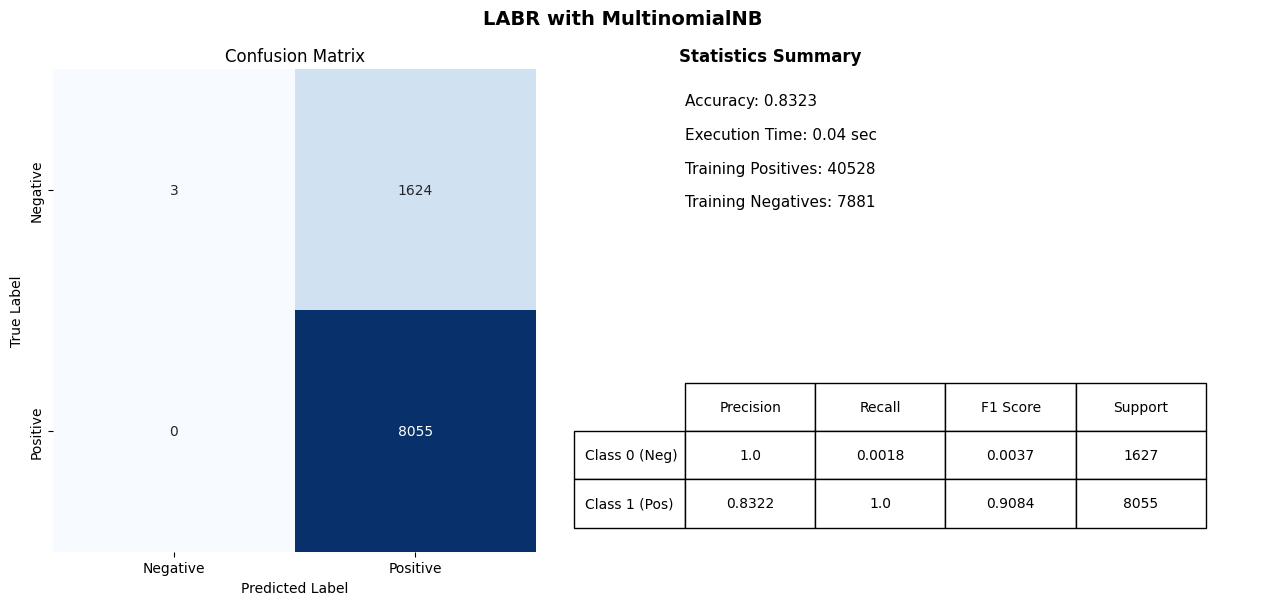

In [268]:
res1 = run_model_on_csv(
    'LABR.csv',
    model_class=MultinomialNB,
    model_name='MultinomialNB',
    dataset_name='LABR',
    sample_percentage=SP1,
)

#### Preprocessed

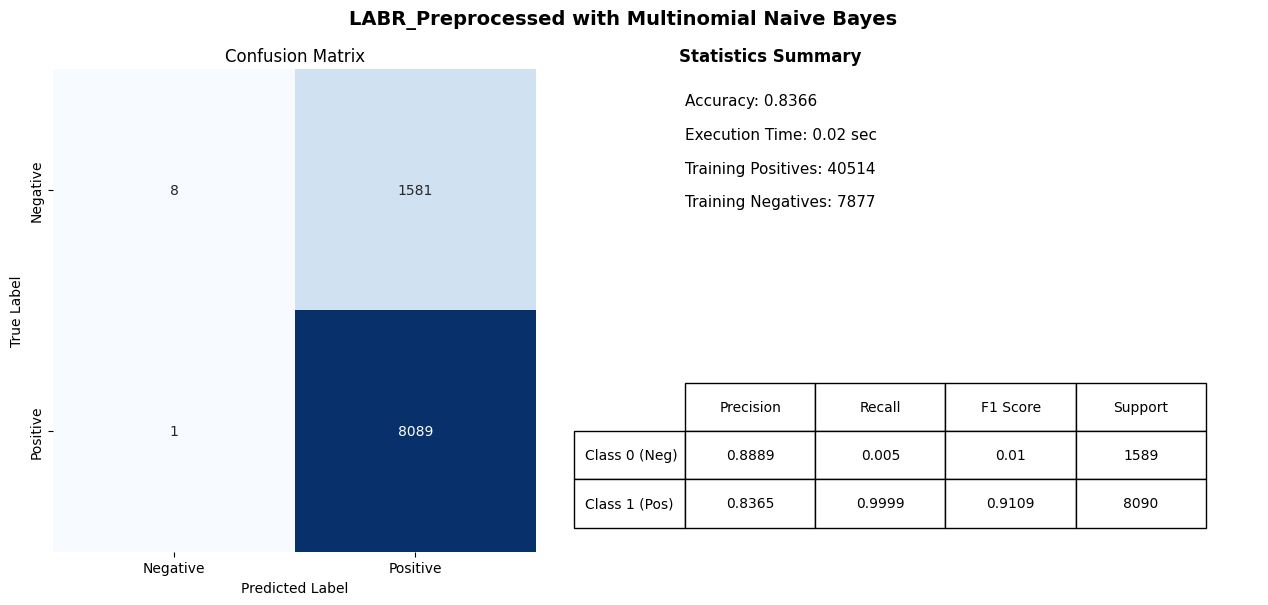

In [269]:
res2 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=MultinomialNB,
    model_name='Multinomial Naive Bayes',
    dataset_name='LABR_Preprocessed',
    sample_percentage=SP1,
)

#### Preprocessed + Balanced

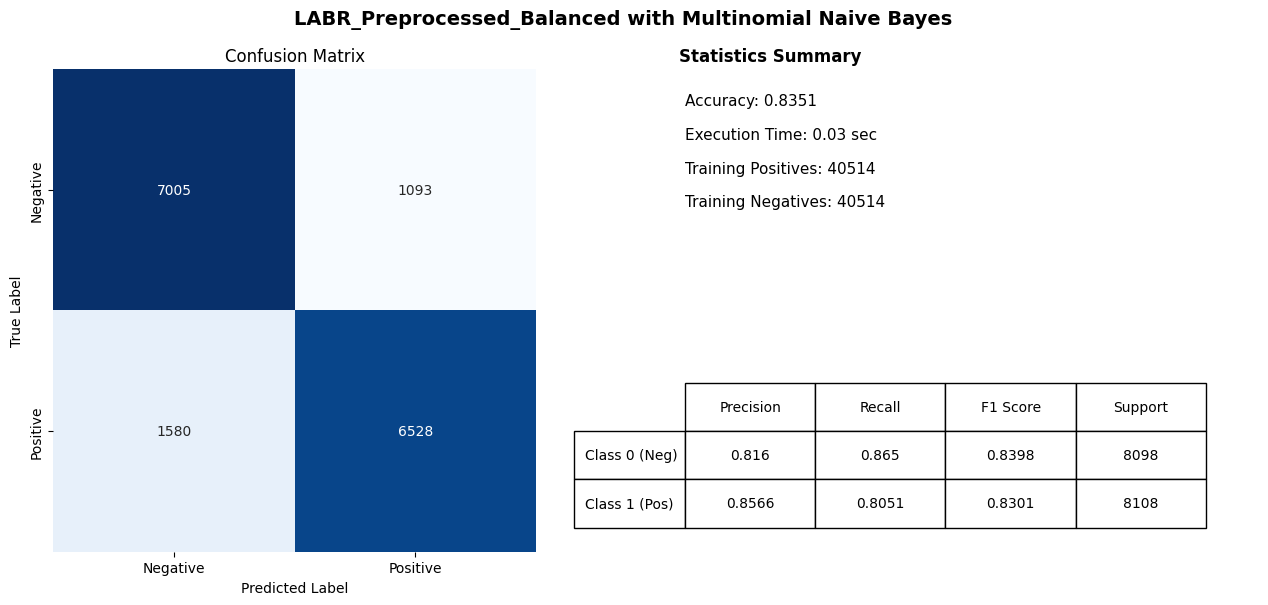

In [270]:
res3 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=MultinomialNB,
    model_name='Multinomial Naive Bayes',
    dataset_name='LABR_Preprocessed_Balanced',
    sample_percentage=SP1,
)

### Hyperparameter / F1

#### Alpha Test — Normal / Preprocessed

LABR.csv | alpha: 0.0001 | F1[0]: 0.307 | F1[1]: 0.9164 | Avg F1: 0.6117 | Time: 0.038s
LABR.csv | alpha: 0.001 | F1[0]: 0.3313 | F1[1]: 0.9186 | Avg F1: 0.6249 | Time: 0.0622s
LABR.csv | alpha: 0.01 | F1[0]: 0.378 | F1[1]: 0.9231 | Avg F1: 0.6505 | Time: 0.0675s
LABR.csv | alpha: 0.1 | F1[0]: 0.1905 | F1[1]: 0.9162 | Avg F1: 0.5534 | Time: 0.0703s
LABR.csv | alpha: 0.5 | F1[0]: 0.0183 | F1[1]: 0.909 | Avg F1: 0.4637 | Time: 0.0613s
LABR.csv | alpha: 1.0 | F1[0]: 0.0037 | F1[1]: 0.9084 | Avg F1: 0.4561 | Time: 0.065s
LABR.csv | alpha: 2.0 | F1[0]: 0.0012 | F1[1]: 0.9083 | Avg F1: 0.4548 | Time: 0.0726s
LABR.csv | alpha: 5.0 | F1[0]: 0.0 | F1[1]: 0.9083 | Avg F1: 0.4541 | Time: 0.0686s
LABR_Pre.csv | alpha: 0.0001 | F1[0]: 0.258 | F1[1]: 0.9185 | Avg F1: 0.5882 | Time: 0.0173s
LABR_Pre.csv | alpha: 0.001 | F1[0]: 0.2604 | F1[1]: 0.9193 | Avg F1: 0.5898 | Time: 0.0171s
LABR_Pre.csv | alpha: 0.01 | F1[0]: 0.2583 | F1[1]: 0.9198 | Avg F1: 0.5891 | Time: 0.0173s
LABR_Pre.csv | alpha: 0.1 | 

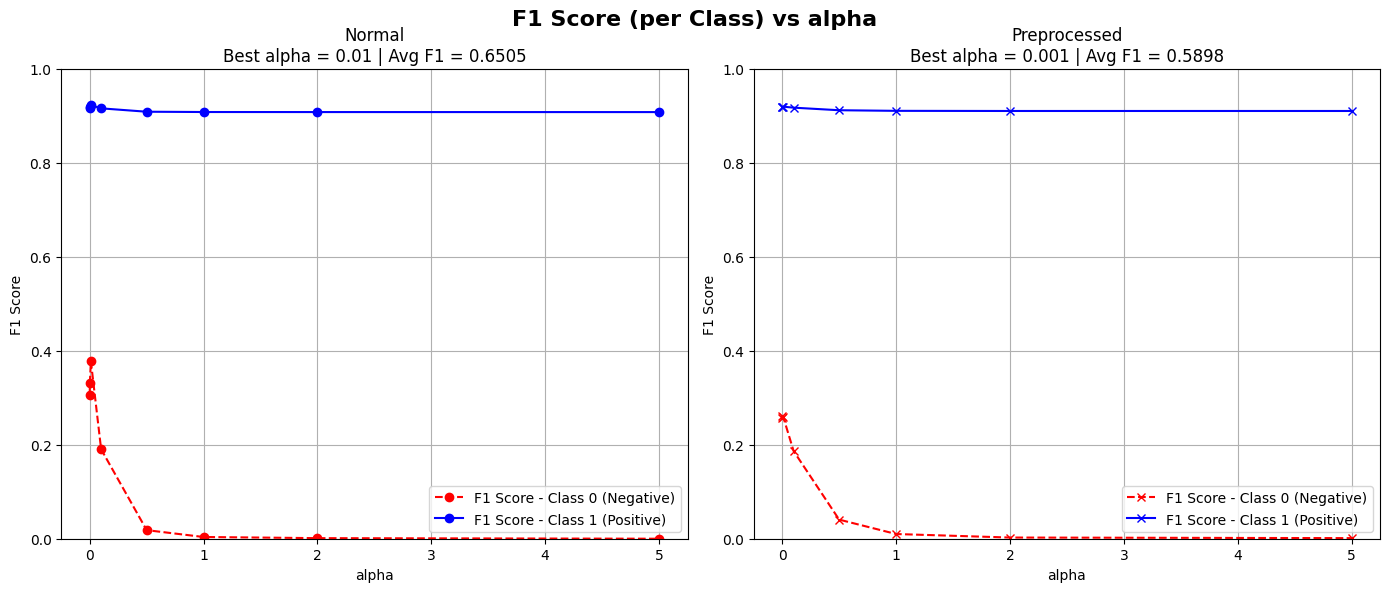


=== Best Results Summary ===
Normal → Best alpha: 0.01 | Avg F1: 0.6505
Preprocessed → Best alpha: 0.001 | Avg F1: 0.5898


In [271]:
test_model_with_param_two_datasets(
    'LABR.csv',
    'LABR_Pre.csv',
    MultinomialNB,
    'alpha',
    [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
    labels=("Normal", "Preprocessed"),
    sample_percentage=SP1
)

#### Alpha Test — Preprocessed / Preprocessed + Balanced

LABR_Pre.csv | alpha: 0.0001 | F1[0]: 0.258 | F1[1]: 0.9185 | Avg F1: 0.5882 | Time: 0.0279s
LABR_Pre.csv | alpha: 0.001 | F1[0]: 0.2604 | F1[1]: 0.9193 | Avg F1: 0.5898 | Time: 0.0204s
LABR_Pre.csv | alpha: 0.01 | F1[0]: 0.2583 | F1[1]: 0.9198 | Avg F1: 0.5891 | Time: 0.0173s
LABR_Pre.csv | alpha: 0.1 | F1[0]: 0.1866 | F1[1]: 0.9177 | Avg F1: 0.5522 | Time: 0.0172s
LABR_Pre.csv | alpha: 0.5 | F1[0]: 0.0407 | F1[1]: 0.9122 | Avg F1: 0.4764 | Time: 0.0177s
LABR_Pre.csv | alpha: 1.0 | F1[0]: 0.01 | F1[1]: 0.9109 | Avg F1: 0.4605 | Time: 0.0176s
LABR_Pre.csv | alpha: 2.0 | F1[0]: 0.0025 | F1[1]: 0.9106 | Avg F1: 0.4566 | Time: 0.0173s
LABR_Pre.csv | alpha: 5.0 | F1[0]: 0.0013 | F1[1]: 0.9106 | Avg F1: 0.4559 | Time: 0.0179s
LABR_Pre_Blc.csv | alpha: 0.0001 | F1[0]: 0.866 | F1[1]: 0.8569 | Avg F1: 0.8614 | Time: 0.0281s
LABR_Pre_Blc.csv | alpha: 0.001 | F1[0]: 0.8651 | F1[1]: 0.8561 | Avg F1: 0.8606 | Time: 0.0298s
LABR_Pre_Blc.csv | alpha: 0.01 | F1[0]: 0.8634 | F1[1]: 0.8545 | Avg F1: 0.

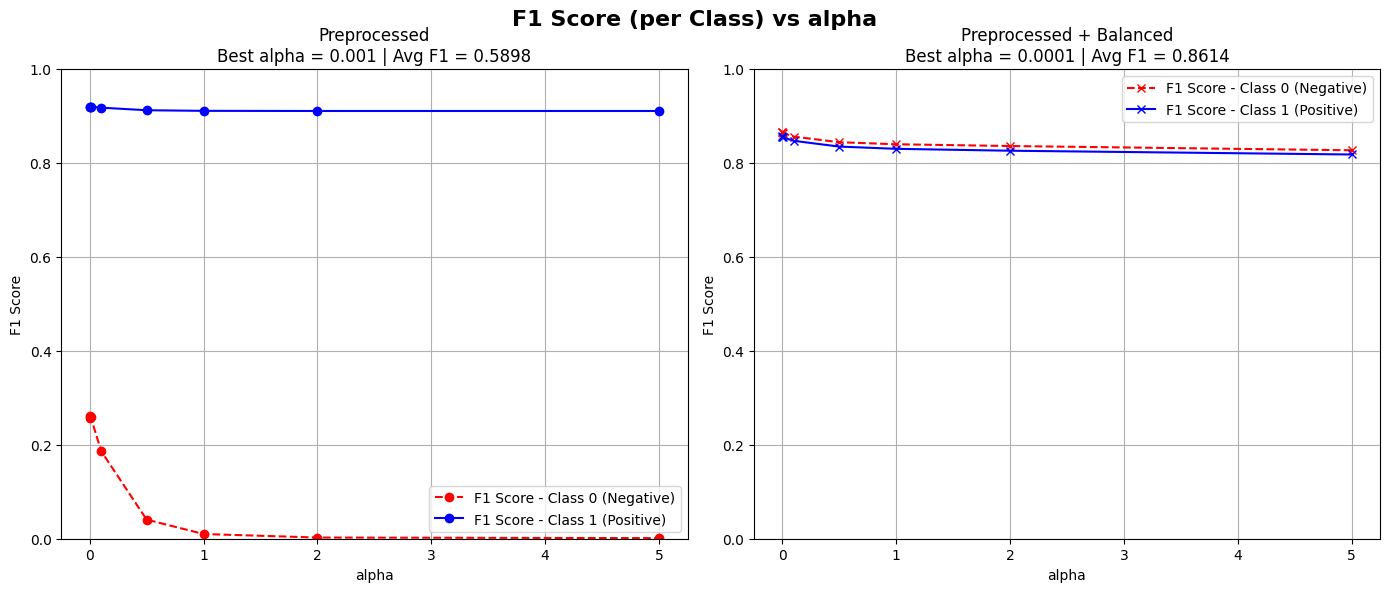


=== Best Results Summary ===
Preprocessed → Best alpha: 0.001 | Avg F1: 0.5898
Preprocessed + Balanced → Best alpha: 0.0001 | Avg F1: 0.8614


In [272]:
test_model_with_param_two_datasets(
    'LABR_Pre.csv',
    'LABR_Pre_Blc.csv',
    MultinomialNB,
    'alpha',
    [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
    labels=("Preprocessed", "Preprocessed + Balanced"),
    sample_percentage=SP1
)

### Result 2 (Best Hyperparameter)

##### Best Hyperparameters

In [273]:
HP_Normal = {'alpha': 0.01}
HP_Preprocessed = {'alpha': 0.001}
HP_Balanced = {'alpha': 0.0001}

#### Normal

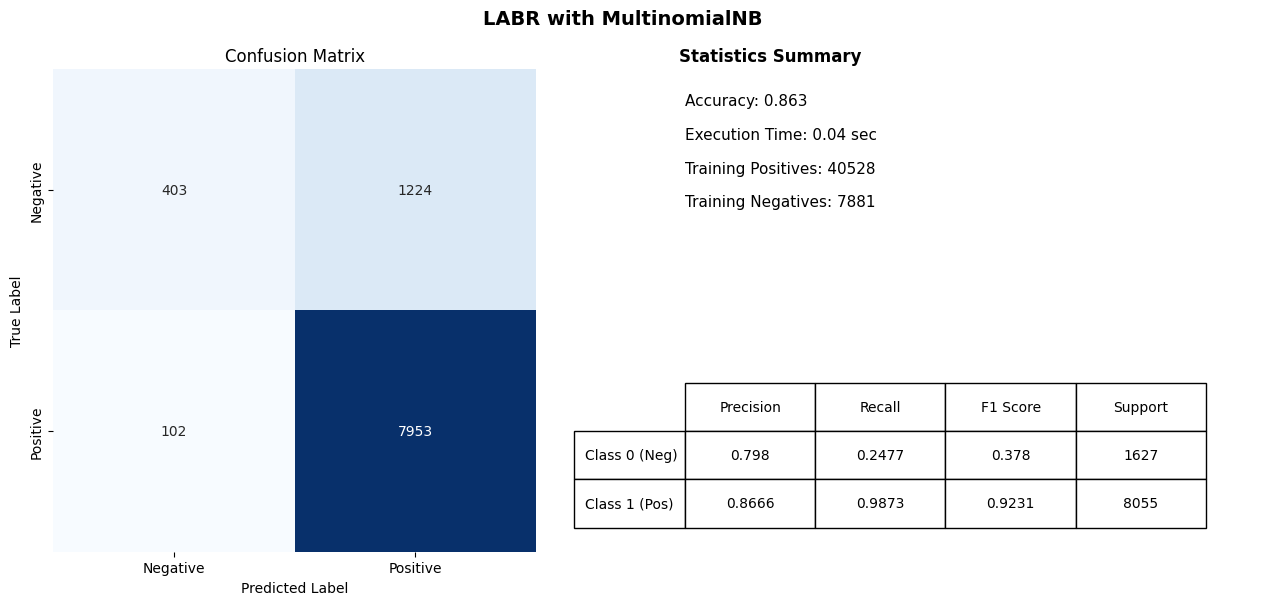

In [274]:
res4 = run_model_on_csv(
    'LABR.csv',
    model_class=MultinomialNB,
    model_name='MultinomialNB',
    dataset_name='LABR',
    sample_percentage=SP1,
    model_params=HP_Normal,
)

#### Preprocessed

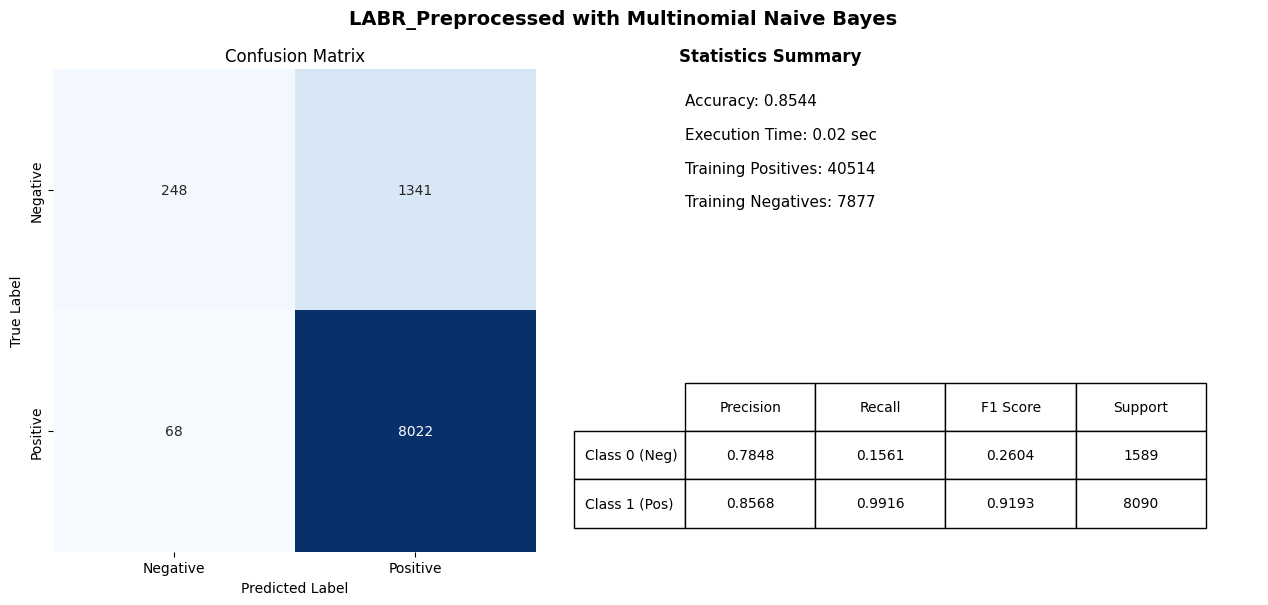

In [275]:
res5 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=MultinomialNB,
    model_name='Multinomial Naive Bayes',
    dataset_name='LABR_Preprocessed',
    sample_percentage=SP1,
    model_params=HP_Preprocessed,
)

#### Preprocessed + Balanced

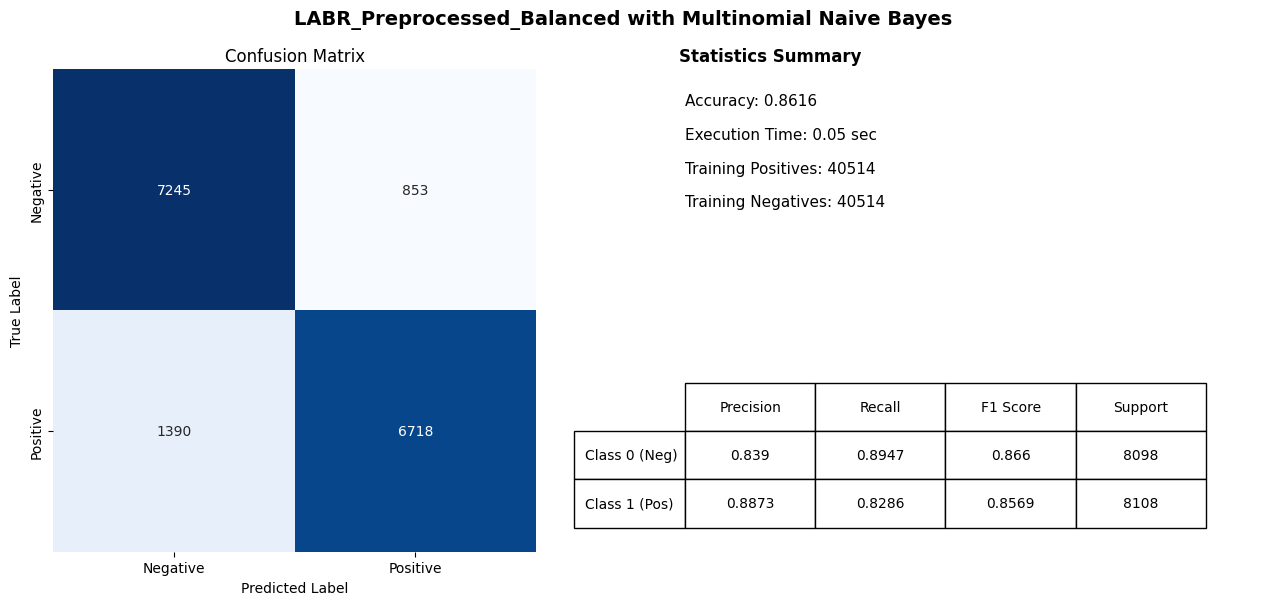

In [276]:
res6 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=MultinomialNB,
    model_name='Multinomial Naive Bayes',
    dataset_name='LABR_Preprocessed_Balanced',
    sample_percentage=SP1,
    model_params=HP_Balanced,
)

## **Complement Naive Bayes**

### Result 1 (Default Hyperparameter)

#### Normal

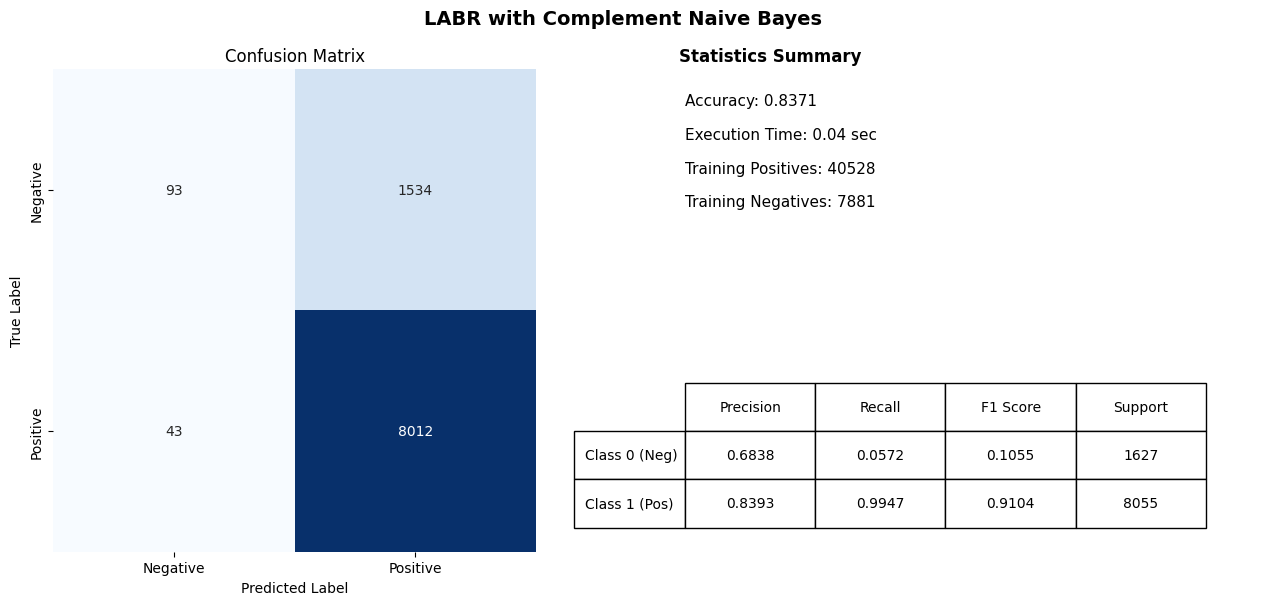

In [277]:
res7 = run_model_on_csv(
    'LABR.csv',
    model_class=ComplementNB,
    model_name='Complement Naive Bayes',
    dataset_name='LABR',
    sample_percentage=SP2,
)

#### Preprocessed

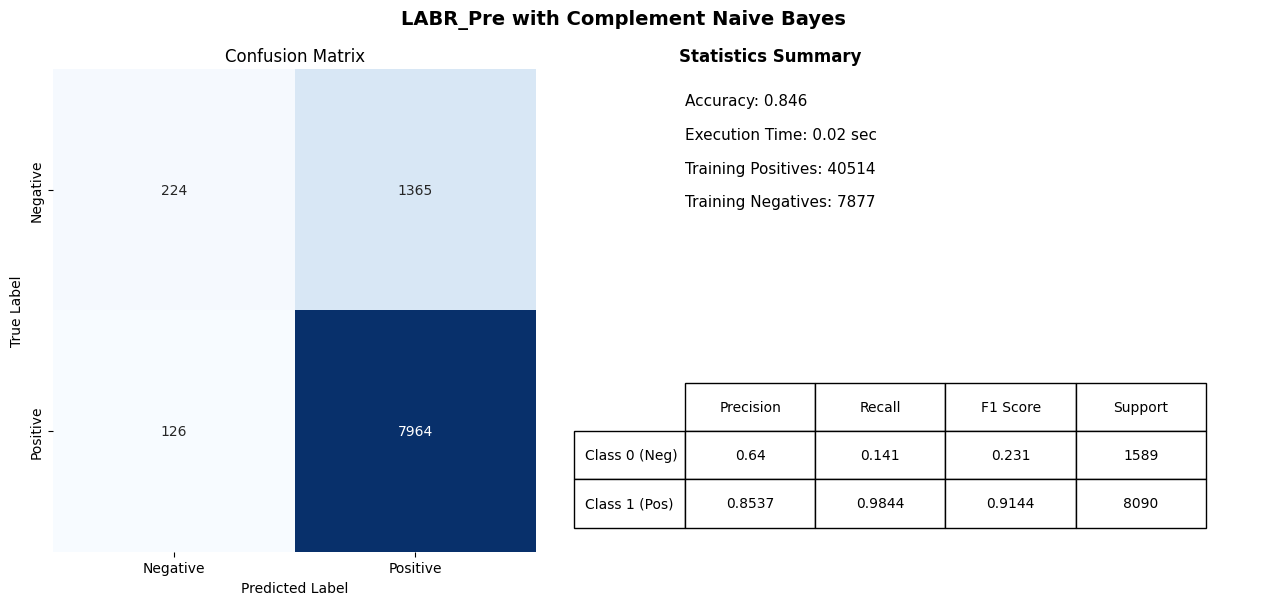

In [278]:
res8 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=ComplementNB,
    model_name='Complement Naive Bayes',
    dataset_name='LABR_Pre',
    sample_percentage=SP2,
)

#### Preprocessed + Balanced

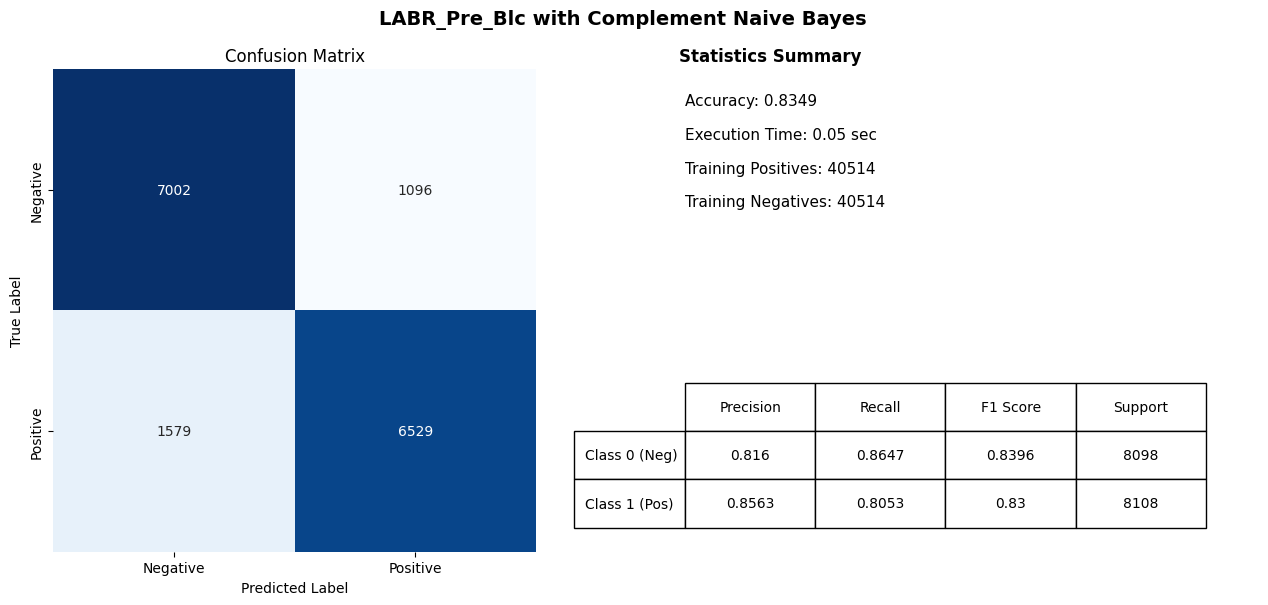

In [279]:
res9 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=ComplementNB,
    model_name='Complement Naive Bayes',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP2,
)

### Hyperparameter / F1

#### Alpha Test — Normal / Preprocessed

LABR.csv | alpha: 0.0001 | F1[0]: 0.4315 | F1[1]: 0.8968 | Avg F1: 0.6641 | Time: 0.039s
LABR.csv | alpha: 0.001 | F1[0]: 0.4843 | F1[1]: 0.8998 | Avg F1: 0.692 | Time: 0.0419s
LABR.csv | alpha: 0.01 | F1[0]: 0.5537 | F1[1]: 0.9024 | Avg F1: 0.728 | Time: 0.0424s
LABR.csv | alpha: 0.1 | F1[0]: 0.5609 | F1[1]: 0.9243 | Avg F1: 0.7426 | Time: 0.0413s
LABR.csv | alpha: 0.5 | F1[0]: 0.1842 | F1[1]: 0.9124 | Avg F1: 0.5483 | Time: 0.0407s
LABR.csv | alpha: 1.0 | F1[0]: 0.1055 | F1[1]: 0.9104 | Avg F1: 0.508 | Time: 0.0411s
LABR.csv | alpha: 2.0 | F1[0]: 0.0652 | F1[1]: 0.9089 | Avg F1: 0.487 | Time: 0.0396s
LABR.csv | alpha: 5.0 | F1[0]: 0.0378 | F1[1]: 0.9079 | Avg F1: 0.4729 | Time: 0.0394s
LABR_Pre.csv | alpha: 0.0001 | F1[0]: 0.5014 | F1[1]: 0.8742 | Avg F1: 0.6878 | Time: 0.0189s
LABR_Pre.csv | alpha: 0.001 | F1[0]: 0.5121 | F1[1]: 0.8747 | Avg F1: 0.6934 | Time: 0.0242s
LABR_Pre.csv | alpha: 0.01 | F1[0]: 0.5346 | F1[1]: 0.8785 | Avg F1: 0.7065 | Time: 0.0262s
LABR_Pre.csv | alpha: 0.

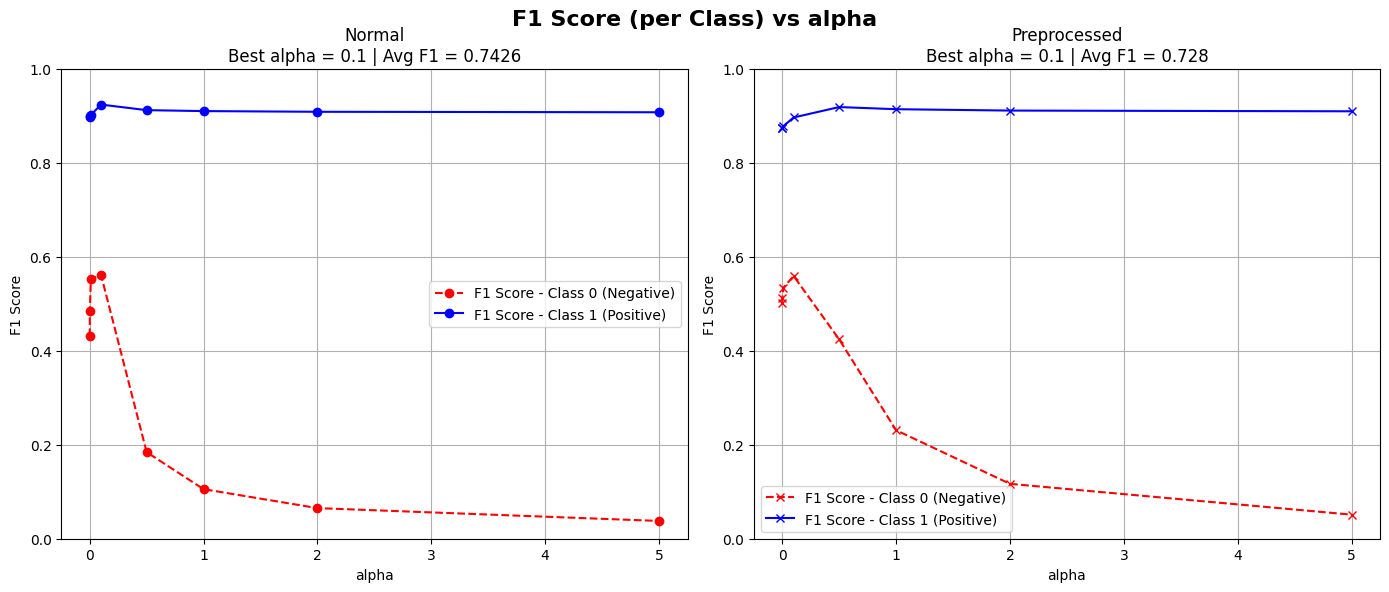


=== Best Results Summary ===
Normal → Best alpha: 0.1 | Avg F1: 0.7426
Preprocessed → Best alpha: 0.1 | Avg F1: 0.728


In [280]:
test_model_with_param_two_datasets(
    'LABR.csv',
    'LABR_Pre.csv',
    ComplementNB,
    'alpha',
    [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
    labels=("Normal", "Preprocessed"),
    sample_percentage=SP2
)

#### Alpha Test — Preprocessed / Preprocessed + Balanced

LABR_Pre.csv | alpha: 0.0001 | F1[0]: 0.5014 | F1[1]: 0.8742 | Avg F1: 0.6878 | Time: 0.0304s
LABR_Pre.csv | alpha: 0.001 | F1[0]: 0.5121 | F1[1]: 0.8747 | Avg F1: 0.6934 | Time: 0.0292s
LABR_Pre.csv | alpha: 0.01 | F1[0]: 0.5346 | F1[1]: 0.8785 | Avg F1: 0.7065 | Time: 0.0294s
LABR_Pre.csv | alpha: 0.1 | F1[0]: 0.5592 | F1[1]: 0.8968 | Avg F1: 0.728 | Time: 0.0299s
LABR_Pre.csv | alpha: 0.5 | F1[0]: 0.4244 | F1[1]: 0.919 | Avg F1: 0.6717 | Time: 0.0305s
LABR_Pre.csv | alpha: 1.0 | F1[0]: 0.231 | F1[1]: 0.9144 | Avg F1: 0.5727 | Time: 0.0292s
LABR_Pre.csv | alpha: 2.0 | F1[0]: 0.1168 | F1[1]: 0.9115 | Avg F1: 0.5142 | Time: 0.0297s
LABR_Pre.csv | alpha: 5.0 | F1[0]: 0.0513 | F1[1]: 0.91 | Avg F1: 0.4806 | Time: 0.0301s
LABR_Pre_Blc.csv | alpha: 0.0001 | F1[0]: 0.866 | F1[1]: 0.857 | Avg F1: 0.8615 | Time: 0.0296s
LABR_Pre_Blc.csv | alpha: 0.001 | F1[0]: 0.8651 | F1[1]: 0.8561 | Avg F1: 0.8606 | Time: 0.0302s
LABR_Pre_Blc.csv | alpha: 0.01 | F1[0]: 0.8634 | F1[1]: 0.8545 | Avg F1: 0.859

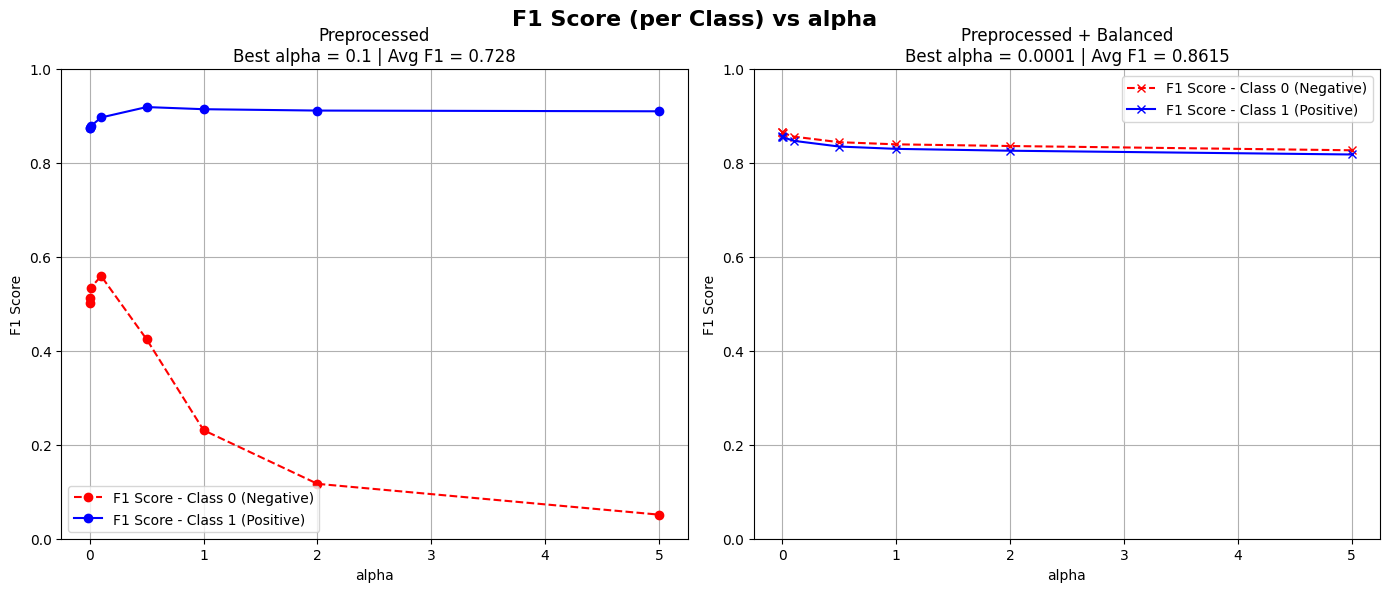


=== Best Results Summary ===
Preprocessed → Best alpha: 0.1 | Avg F1: 0.728
Preprocessed + Balanced → Best alpha: 0.0001 | Avg F1: 0.8615


In [281]:
test_model_with_param_two_datasets(
    'LABR_Pre.csv',
    'LABR_Pre_Blc.csv',
    ComplementNB,
    'alpha',
    [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
    labels=("Preprocessed", "Preprocessed + Balanced"),
    sample_percentage=SP2
)

### Result 2 (Best Hyperparameter)

##### Best Hyperparameters

In [282]:
HP_Normal = {'alpha': 0.1}
HP_Preprocessed = {'alpha': 0.1}
HP_Balanced = {'alpha': 0.0001}

#### Normal

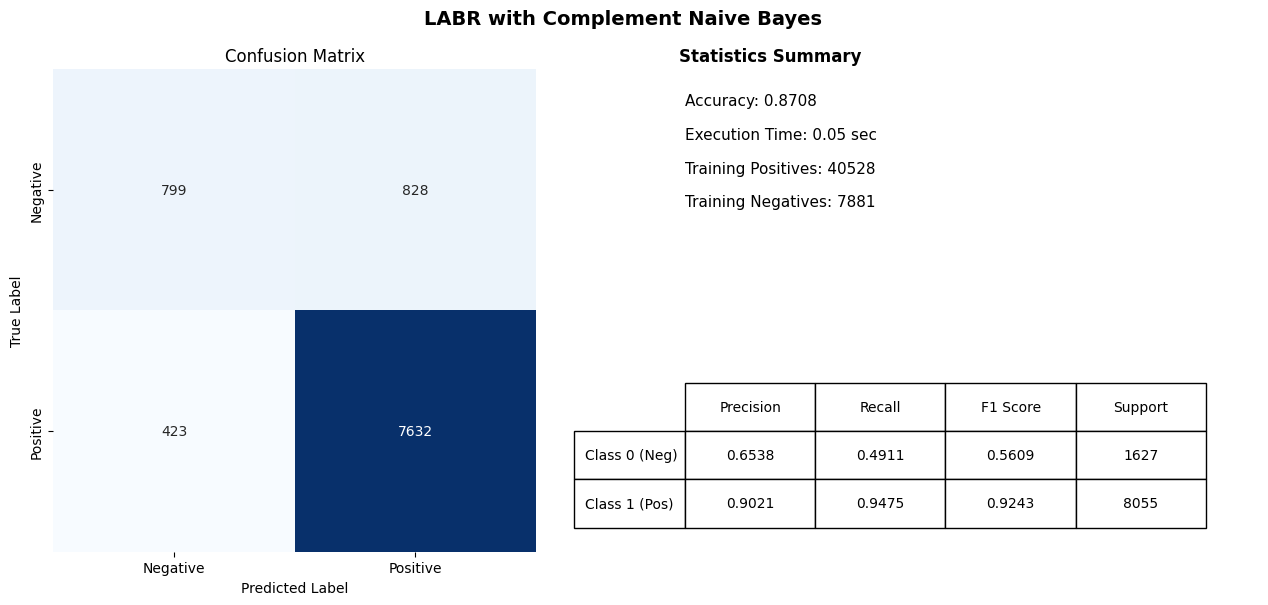

In [283]:
res10 = run_model_on_csv(
    'LABR.csv',
    model_class=ComplementNB,
    model_name='Complement Naive Bayes',
    dataset_name='LABR',
    sample_percentage=SP2,
    model_params=HP_Normal,
)

#### Preprocessed

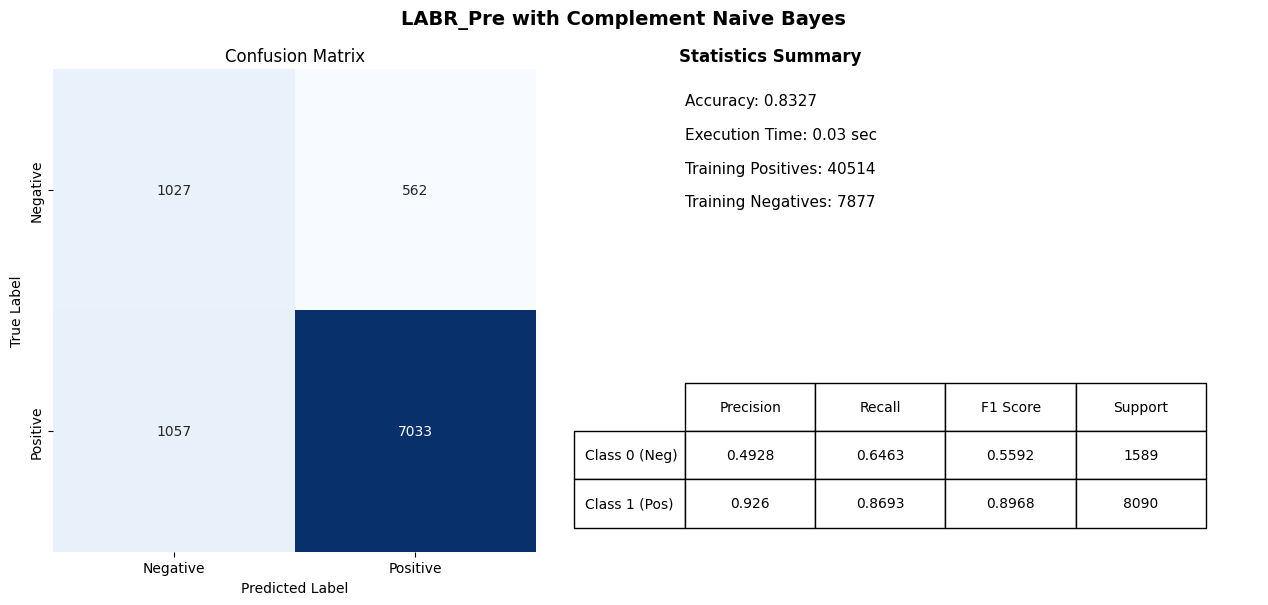

In [284]:
res11 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=ComplementNB,
    model_name='Complement Naive Bayes',
    dataset_name='LABR_Pre',
    sample_percentage=SP2,
    model_params=HP_Preprocessed,
)

#### Preprocessed + Balanced

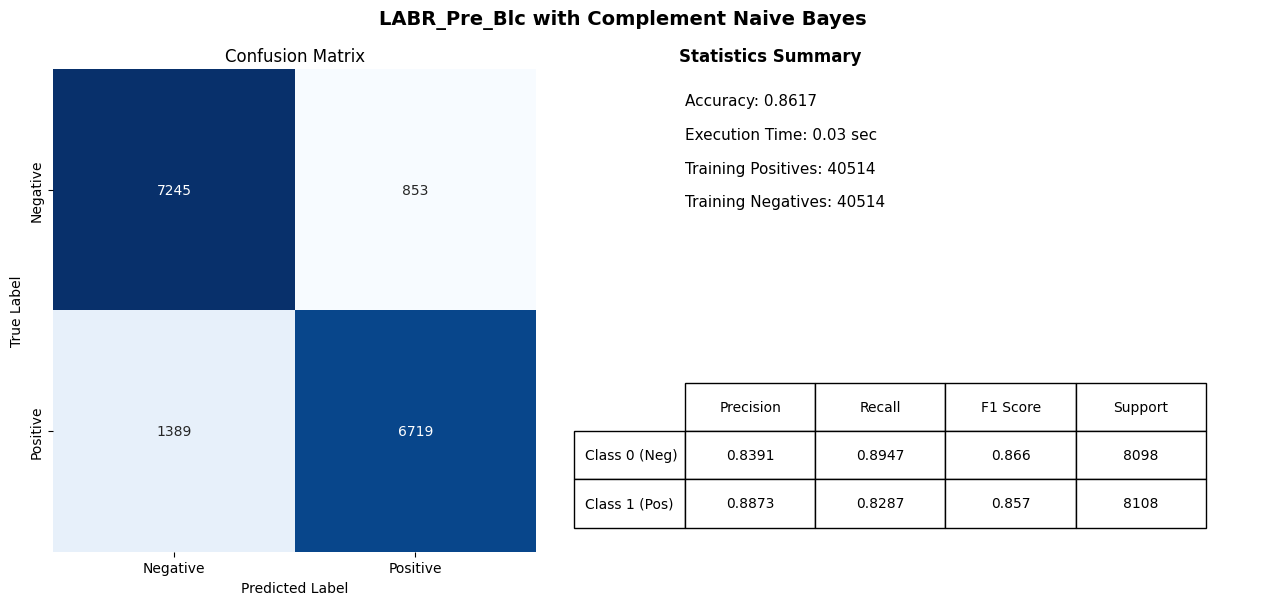

In [285]:
res12 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=ComplementNB,
    model_name='Complement Naive Bayes',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP2,
    model_params=HP_Balanced,
)

## **SVM (Linear)**

### Result 1 (Default Hyperparameter)

#### Normal

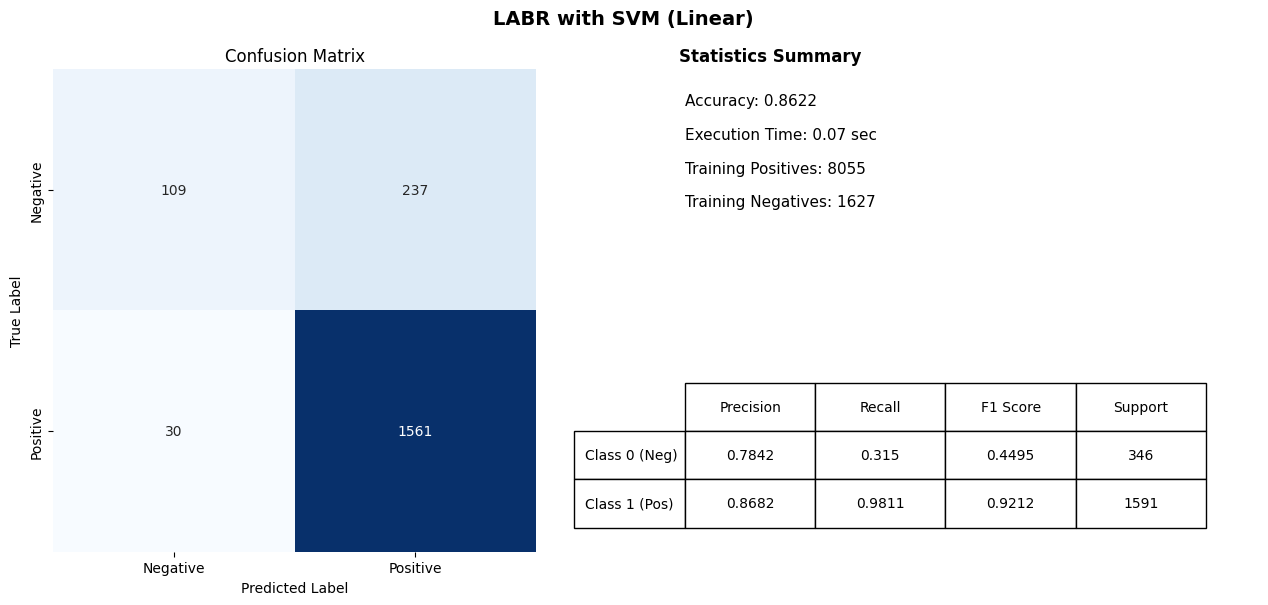

In [286]:
res13 = run_model_on_csv(
    'LABR.csv',
    model_class=LinearSVC,
    model_name='SVM (Linear)',
    dataset_name='LABR',
    sample_percentage=SP3,
)

#### Preprocessed

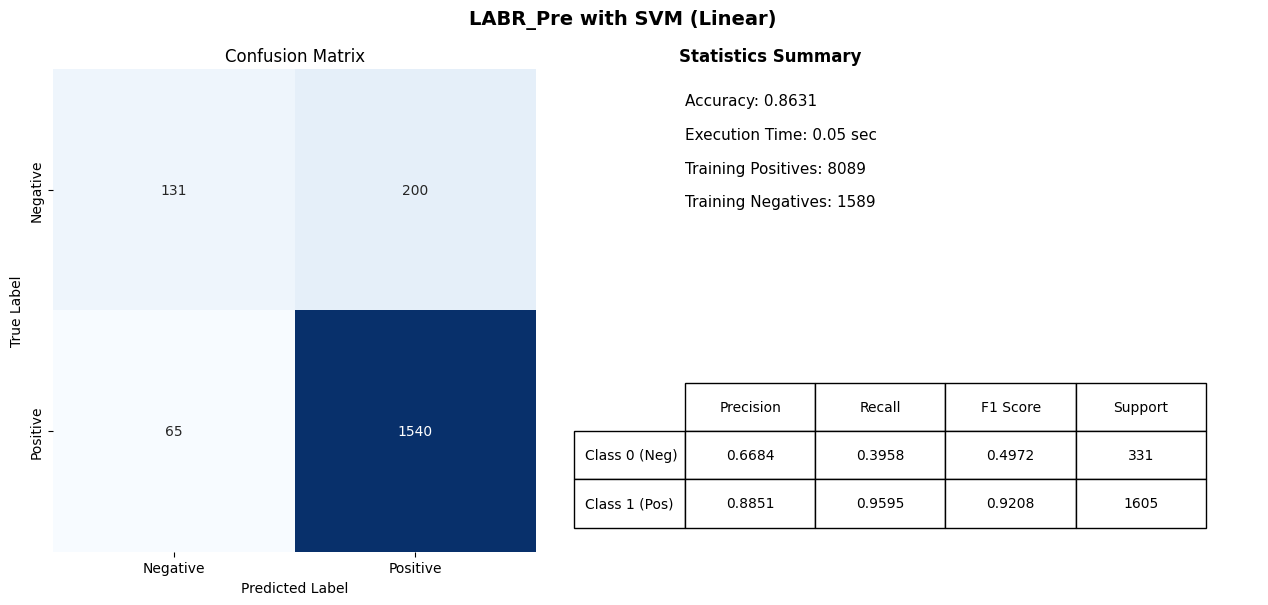

In [287]:
res14 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=LinearSVC,
    model_name='SVM (Linear)',
    dataset_name='LABR_Pre',
    sample_percentage=SP3,
)

#### Preprocessed + Balanced

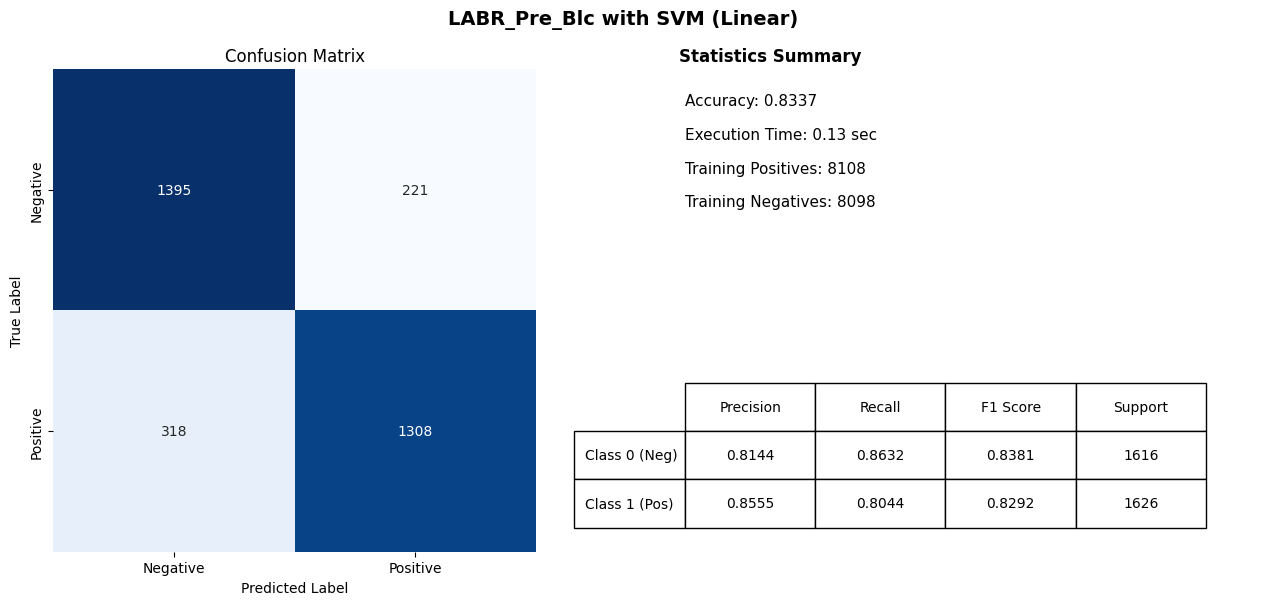

In [288]:
res15 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=LinearSVC,
    model_name='SVM (Linear)',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP3,
)

### Hyperparameter / F1

#### C Test — Normal / Preprocessed

LABR.csv | C: 0.01 | F1[0]: 0.0 | F1[1]: 0.9019 | Avg F1: 0.451 | Time: 0.0237s
LABR.csv | C: 0.1 | F1[0]: 0.1493 | F1[1]: 0.9088 | Avg F1: 0.5291 | Time: 0.0373s
LABR.csv | C: 0.5 | F1[0]: 0.4009 | F1[1]: 0.9205 | Avg F1: 0.6607 | Time: 0.0522s
LABR.csv | C: 1.0 | F1[0]: 0.4495 | F1[1]: 0.9212 | Avg F1: 0.6854 | Time: 0.1295s
LABR.csv | C: 2.0 | F1[0]: 0.4826 | F1[1]: 0.9201 | Avg F1: 0.7014 | Time: 0.1857s
LABR.csv | C: 5.0 | F1[0]: 0.5018 | F1[1]: 0.9183 | Avg F1: 0.7101 | Time: 0.2949s
LABR.csv | C: 10.0 | F1[0]: 0.5072 | F1[1]: 0.9181 | Avg F1: 0.7127 | Time: 0.3861s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LABR.csv | C: 100.0 | F1[0]: 0.5116 | F1[1]: 0.9176 | Avg F1: 0.7146 | Time: 1.8616s
LABR_Pre.csv | C: 0.01 | F1[0]: 0.0 | F1[1]: 0.9065 | Avg F1: 0.4533 | Time: 0.02s
LABR_Pre.csv | C: 0.1 | F1[0]: 0.2507 | F1[1]: 0.9177 | Avg F1: 0.5842 | Time: 0.022s
LABR_Pre.csv | C: 0.5 | F1[0]: 0.4748 | F1[1]: 0.9264 | Avg F1: 0.7006 | Time: 0.0329s
LABR_Pre.csv | C: 1.0 | F1[0]: 0.4972 | F1[1]: 0.9208 | Avg F1: 0.709 | Time: 0.0452s
LABR_Pre.csv | C: 2.0 | F1[0]: 0.4956 | F1[1]: 0.9138 | Avg F1: 0.7047 | Time: 0.0695s
LABR_Pre.csv | C: 5.0 | F1[0]: 0.491 | F1[1]: 0.9046 | Avg F1: 0.6978 | Time: 0.1404s
LABR_Pre.csv | C: 10.0 | F1[0]: 0.4841 | F1[1]: 0.9001 | Avg F1: 0.6921 | Time: 0.2491s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LABR_Pre.csv | C: 100.0 | F1[0]: 0.4748 | F1[1]: 0.8893 | Avg F1: 0.682 | Time: 0.561s


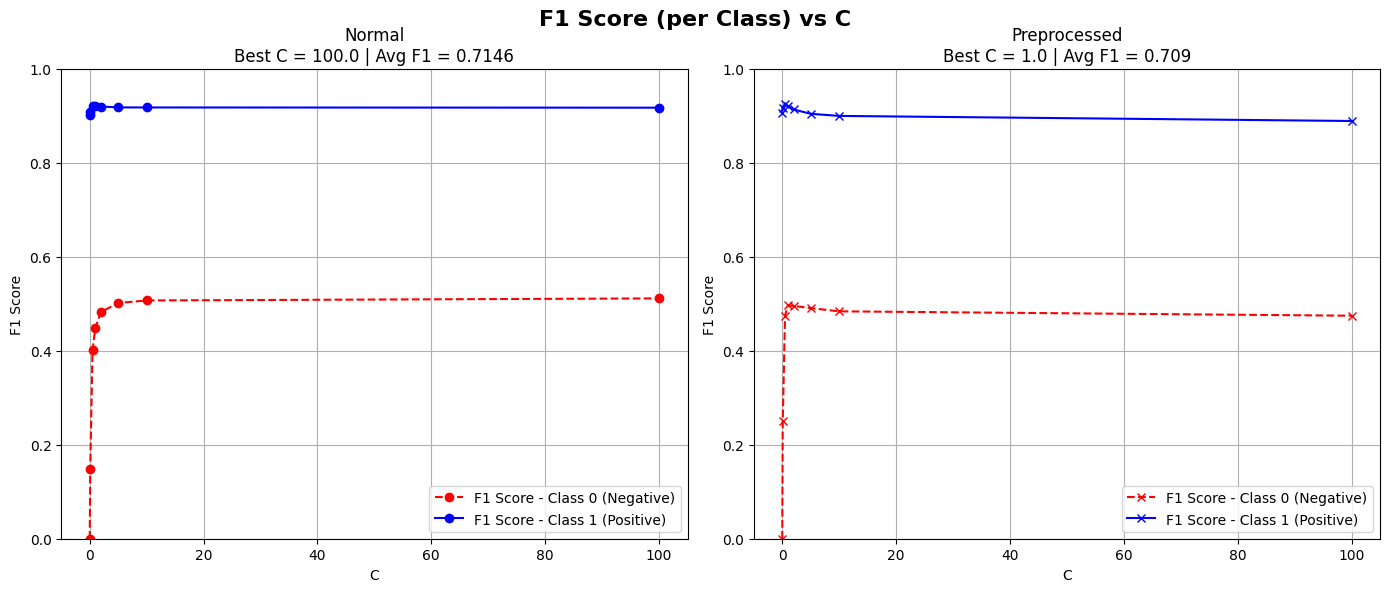


=== Best Results Summary ===
Normal → Best C: 100.0 | Avg F1: 0.7146
Preprocessed → Best C: 1.0 | Avg F1: 0.709


In [289]:
test_model_with_param_two_datasets(
    'LABR.csv',
    'LABR_Pre.csv',
    LinearSVC,
    'C',
    [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 100.0],
    labels=("Normal", "Preprocessed"),
    sample_percentage=SP3
)

#### C Test — Preprocessed / Preprocessed + Balanced

LABR_Pre.csv | C: 0.01 | F1[0]: 0.0 | F1[1]: 0.9065 | Avg F1: 0.4533 | Time: 0.0183s
LABR_Pre.csv | C: 0.1 | F1[0]: 0.2507 | F1[1]: 0.9177 | Avg F1: 0.5842 | Time: 0.0241s
LABR_Pre.csv | C: 0.5 | F1[0]: 0.4748 | F1[1]: 0.9264 | Avg F1: 0.7006 | Time: 0.0376s
LABR_Pre.csv | C: 1.0 | F1[0]: 0.4972 | F1[1]: 0.9208 | Avg F1: 0.709 | Time: 0.0476s
LABR_Pre.csv | C: 2.0 | F1[0]: 0.4956 | F1[1]: 0.9138 | Avg F1: 0.7047 | Time: 0.0744s
LABR_Pre.csv | C: 5.0 | F1[0]: 0.491 | F1[1]: 0.9046 | Avg F1: 0.6978 | Time: 0.1435s
LABR_Pre.csv | C: 10.0 | F1[0]: 0.4841 | F1[1]: 0.9001 | Avg F1: 0.6921 | Time: 0.3288s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LABR_Pre.csv | C: 100.0 | F1[0]: 0.4741 | F1[1]: 0.889 | Avg F1: 0.6815 | Time: 0.5668s
LABR_Pre_Blc.csv | C: 0.01 | F1[0]: 0.7961 | F1[1]: 0.7905 | Avg F1: 0.7933 | Time: 0.0431s
LABR_Pre_Blc.csv | C: 0.1 | F1[0]: 0.8214 | F1[1]: 0.8152 | Avg F1: 0.8183 | Time: 0.0481s
LABR_Pre_Blc.csv | C: 0.5 | F1[0]: 0.8379 | F1[1]: 0.8294 | Avg F1: 0.8336 | Time: 0.089s
LABR_Pre_Blc.csv | C: 1.0 | F1[0]: 0.8381 | F1[1]: 0.8292 | Avg F1: 0.8336 | Time: 0.1296s
LABR_Pre_Blc.csv | C: 2.0 | F1[0]: 0.8309 | F1[1]: 0.8202 | Avg F1: 0.8256 | Time: 0.2107s
LABR_Pre_Blc.csv | C: 5.0 | F1[0]: 0.8239 | F1[1]: 0.809 | Avg F1: 0.8165 | Time: 0.5262s
LABR_Pre_Blc.csv | C: 10.0 | F1[0]: 0.8228 | F1[1]: 0.8083 | Avg F1: 0.8156 | Time: 0.9989s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LABR_Pre_Blc.csv | C: 100.0 | F1[0]: 0.8065 | F1[1]: 0.7838 | Avg F1: 0.7952 | Time: 1.5731s


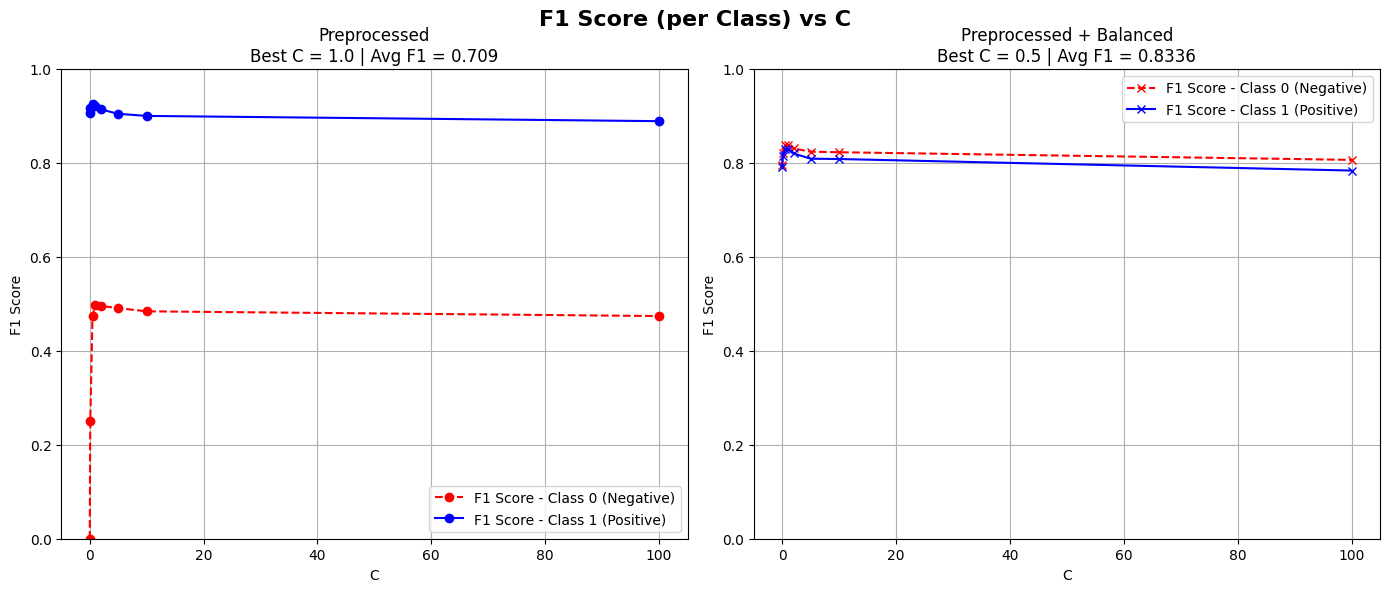


=== Best Results Summary ===
Preprocessed → Best C: 1.0 | Avg F1: 0.709
Preprocessed + Balanced → Best C: 0.5 | Avg F1: 0.8336


In [290]:
test_model_with_param_two_datasets(
    'LABR_Pre.csv',
    'LABR_Pre_Blc.csv',
    LinearSVC,
    'C',
    [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 100.0],
    labels=("Preprocessed", "Preprocessed + Balanced"),
    sample_percentage=SP3
)

### Result 2 (Best Hyperparameter)

##### Best Hyperparameters

In [291]:
HP_Normal = {'C': 100}
HP_Preprocessed = {'C': 1}
HP_Balanced = {'C': 0.5}

#### Normal

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


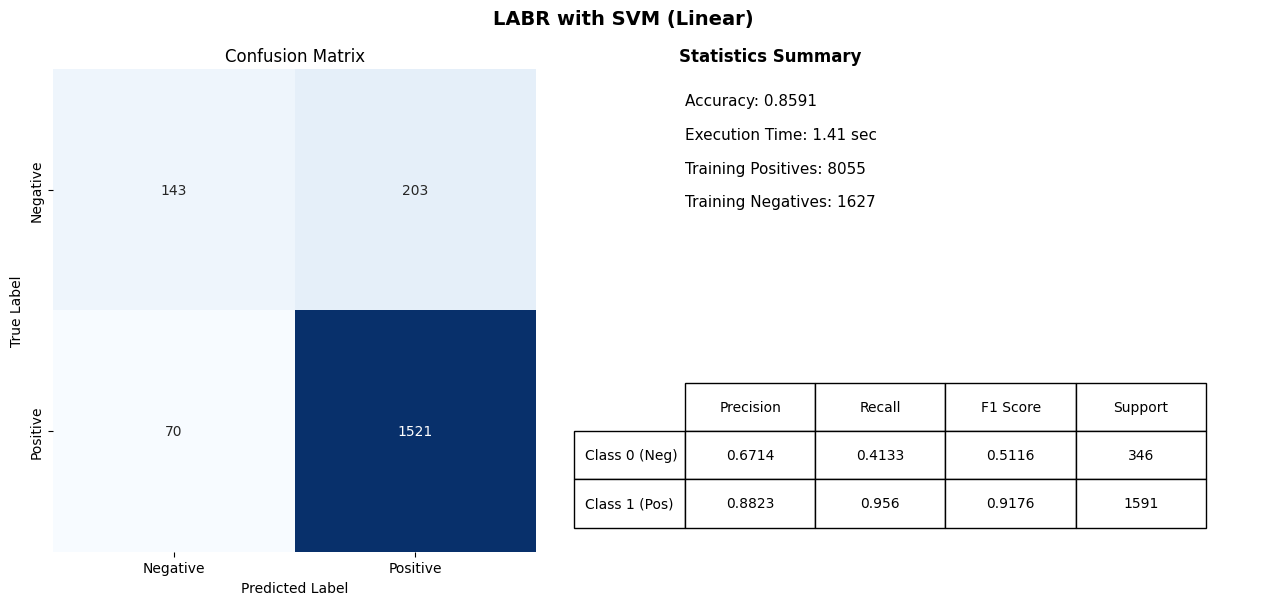

In [292]:
res16 = run_model_on_csv(
    'LABR.csv',
    model_class=LinearSVC,
    model_name='SVM (Linear)',
    dataset_name='LABR',
    sample_percentage=SP3,
    model_params=HP_Normal,
)

#### Preprocessed

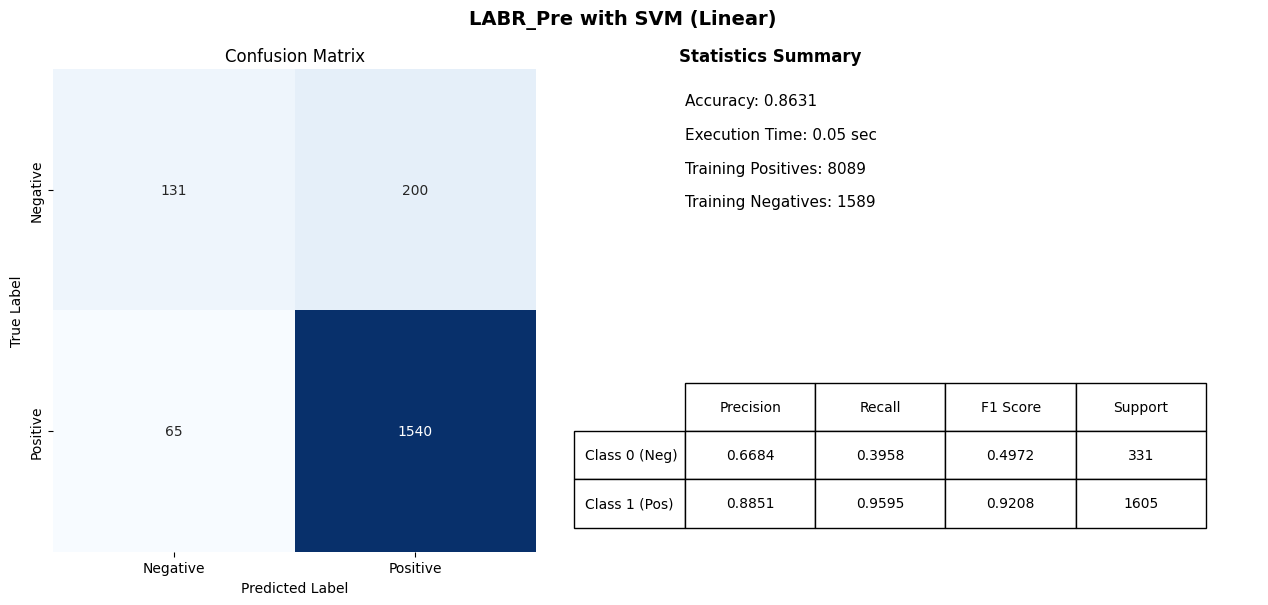

In [293]:
res17 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=LinearSVC,
    model_name='SVM (Linear)',
    dataset_name='LABR_Pre',
    sample_percentage=SP3,
    model_params=HP_Preprocessed,
)

#### Preprocessed + Balanced

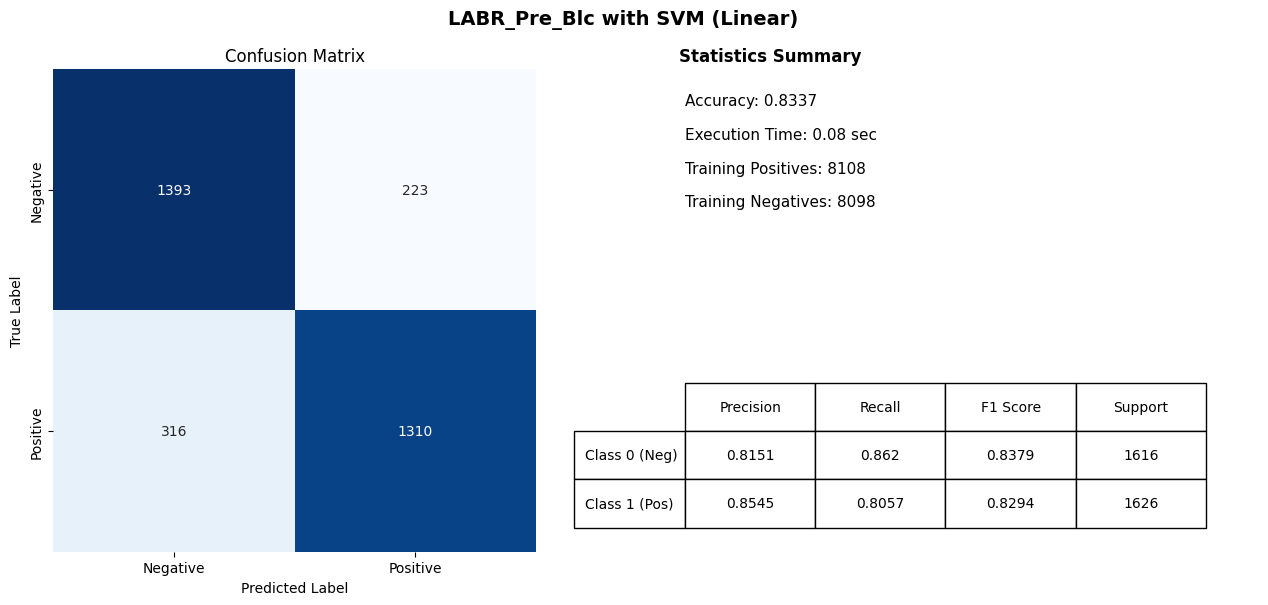

In [294]:
res18 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=LinearSVC,
    model_name='SVM (Linear)',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP3,
    model_params=HP_Balanced,
)

## **LogisticRegression**

### Result 1 (Default Hyperparameter)

#### Normal

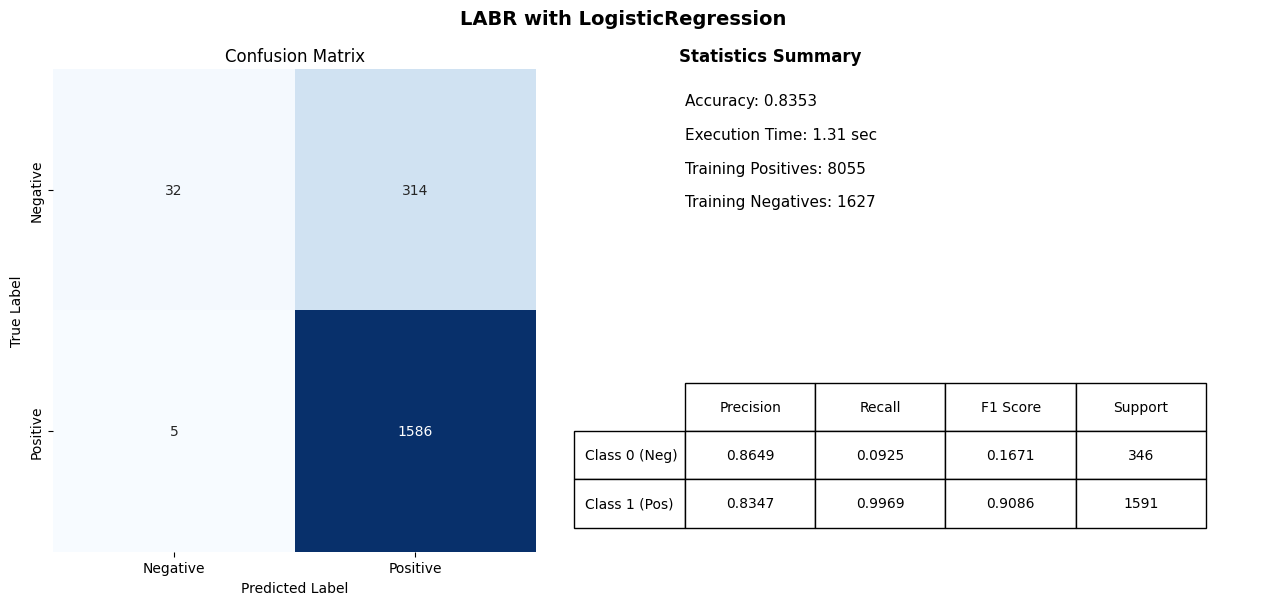

In [295]:
res25 = run_model_on_csv(
    'LABR.csv',
    model_class=LogisticRegression,
    model_name='LogisticRegression',
    dataset_name='LABR',
    sample_percentage=SP4,
)

#### Preprocessed

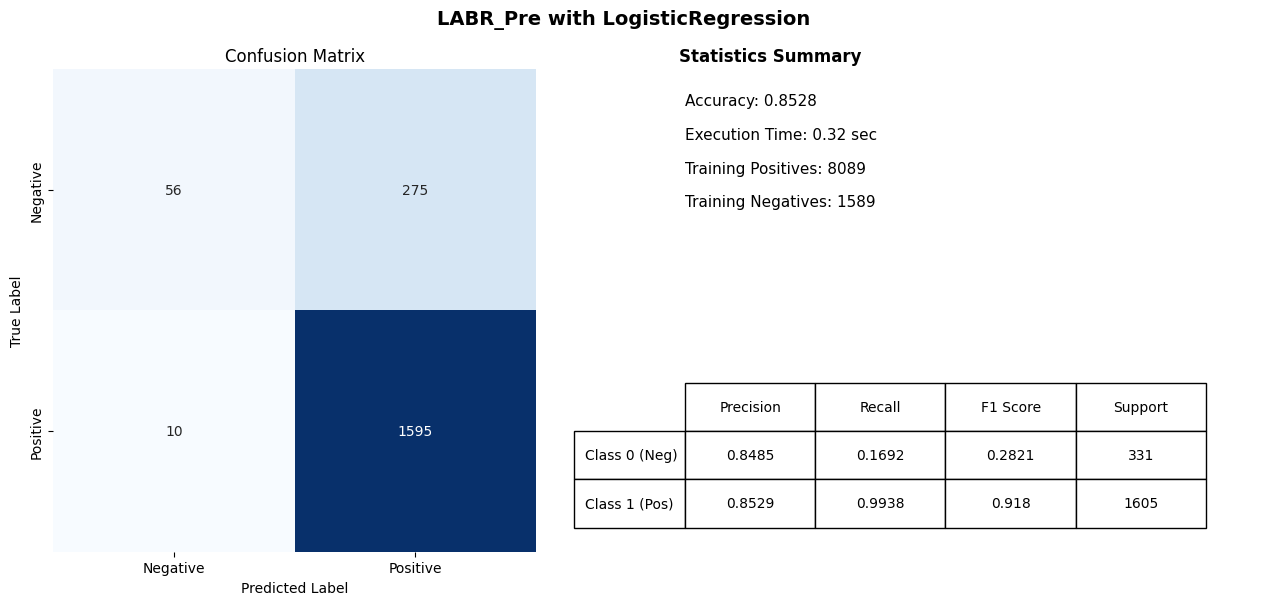

In [296]:
res26 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=LogisticRegression,
    model_name='LogisticRegression',
    dataset_name='LABR_Pre',
    sample_percentage=SP4,
)

#### Preprocessed + Balanced

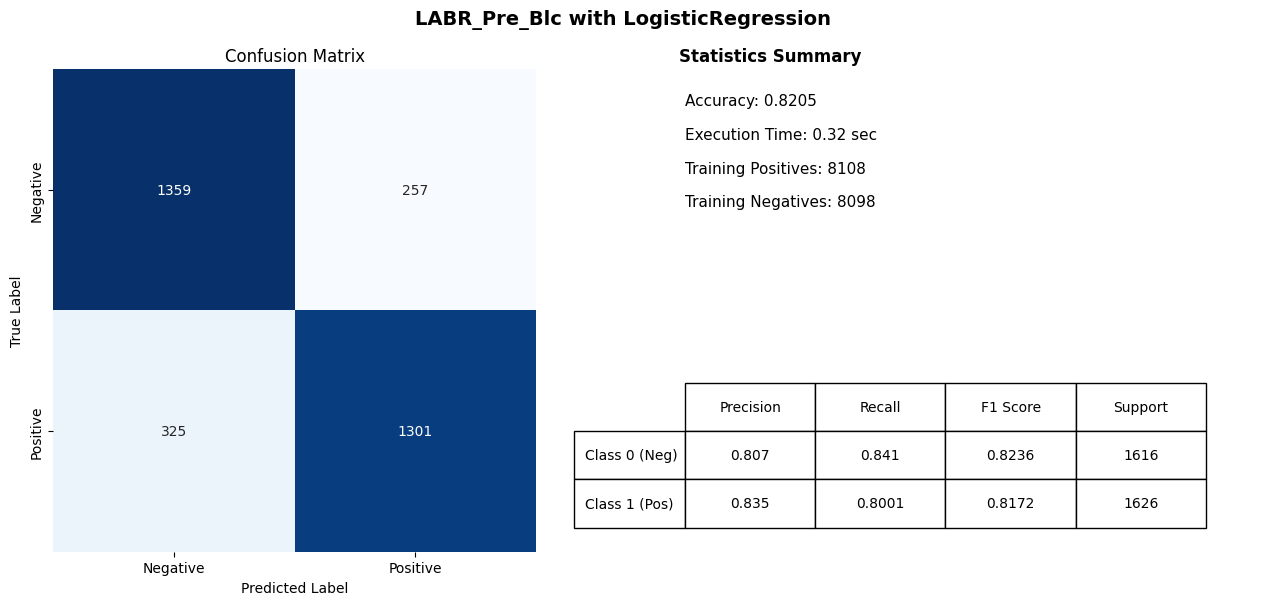

In [297]:
res27 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=LogisticRegression,
    model_name='LogisticRegression',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP4,
)

### Hyperparameter / F1

#### C Test — Normal / Preprocessed

LABR.csv | C: 0.01 | F1[0]: 0.0 | F1[1]: 0.9019 | Avg F1: 0.451 | Time: 0.4865s
LABR.csv | C: 0.1 | F1[0]: 0.0 | F1[1]: 0.9019 | Avg F1: 0.451 | Time: 0.4441s
LABR.csv | C: 0.5 | F1[0]: 0.067 | F1[1]: 0.905 | Avg F1: 0.486 | Time: 0.7876s
LABR.csv | C: 1.0 | F1[0]: 0.1671 | F1[1]: 0.9086 | Avg F1: 0.5379 | Time: 1.2886s
LABR.csv | C: 2.0 | F1[0]: 0.3103 | F1[1]: 0.9164 | Avg F1: 0.6133 | Time: 1.7507s
LABR.csv | C: 5.0 | F1[0]: 0.3938 | F1[1]: 0.9199 | Avg F1: 0.6569 | Time: 1.2717s
LABR.csv | C: 10.0 | F1[0]: 0.4249 | F1[1]: 0.9214 | Avg F1: 0.6731 | Time: 1.9481s
LABR.csv | C: 100.0 | F1[0]: 0.4904 | F1[1]: 0.9206 | Avg F1: 0.7055 | Time: 1.9439s
LABR_Pre.csv | C: 0.01 | F1[0]: 0.0 | F1[1]: 0.9065 | Avg F1: 0.4533 | Time: 0.4631s
LABR_Pre.csv | C: 0.1 | F1[0]: 0.0 | F1[1]: 0.9065 | Avg F1: 0.4533 | Time: 0.6408s
LABR_Pre.csv | C: 0.5 | F1[0]: 0.1086 | F1[1]: 0.9114 | Avg F1: 0.51 | Time: 0.5109s
LABR_Pre.csv | C: 1.0 | F1[0]: 0.2821 | F1[1]: 0.918 | Avg F1: 0.6001 | Time: 0.337s
LABR

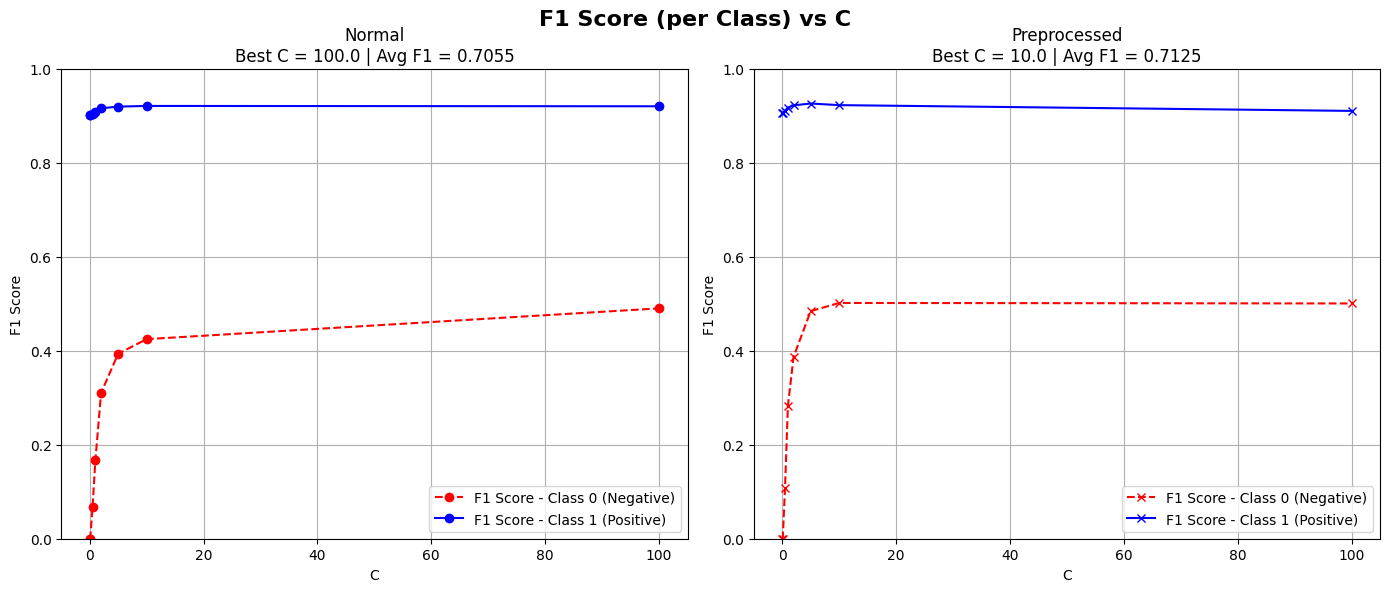


=== Best Results Summary ===
Normal → Best C: 100.0 | Avg F1: 0.7055
Preprocessed → Best C: 10.0 | Avg F1: 0.7125


In [298]:
test_model_with_param_two_datasets(
    'LABR.csv',
    'LABR_Pre.csv',
    LogisticRegression,
    'C',
    [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 100.0],
    labels=("Normal", "Preprocessed"),
    sample_percentage=SP4
)

#### C Test — Preprocessed / Preprocessed + Balanced

LABR_Pre.csv | C: 0.01 | F1[0]: 0.0 | F1[1]: 0.9065 | Avg F1: 0.4533 | Time: 0.1546s
LABR_Pre.csv | C: 0.1 | F1[0]: 0.0 | F1[1]: 0.9065 | Avg F1: 0.4533 | Time: 0.2235s
LABR_Pre.csv | C: 0.5 | F1[0]: 0.1086 | F1[1]: 0.9114 | Avg F1: 0.51 | Time: 0.4328s
LABR_Pre.csv | C: 1.0 | F1[0]: 0.2821 | F1[1]: 0.918 | Avg F1: 0.6001 | Time: 0.3663s
LABR_Pre.csv | C: 2.0 | F1[0]: 0.3871 | F1[1]: 0.9226 | Avg F1: 0.6549 | Time: 0.7564s
LABR_Pre.csv | C: 5.0 | F1[0]: 0.4845 | F1[1]: 0.9265 | Avg F1: 0.7055 | Time: 1.0231s
LABR_Pre.csv | C: 10.0 | F1[0]: 0.5019 | F1[1]: 0.9231 | Avg F1: 0.7125 | Time: 1.2206s
LABR_Pre.csv | C: 100.0 | F1[0]: 0.5009 | F1[1]: 0.9108 | Avg F1: 0.7058 | Time: 2.4829s
LABR_Pre_Blc.csv | C: 0.01 | F1[0]: 0.7864 | F1[1]: 0.7792 | Avg F1: 0.7828 | Time: 0.3123s
LABR_Pre_Blc.csv | C: 0.1 | F1[0]: 0.7957 | F1[1]: 0.7902 | Avg F1: 0.793 | Time: 0.1711s
LABR_Pre_Blc.csv | C: 0.5 | F1[0]: 0.811 | F1[1]: 0.8059 | Avg F1: 0.8084 | Time: 0.2485s
LABR_Pre_Blc.csv | C: 1.0 | F1[0]: 0.

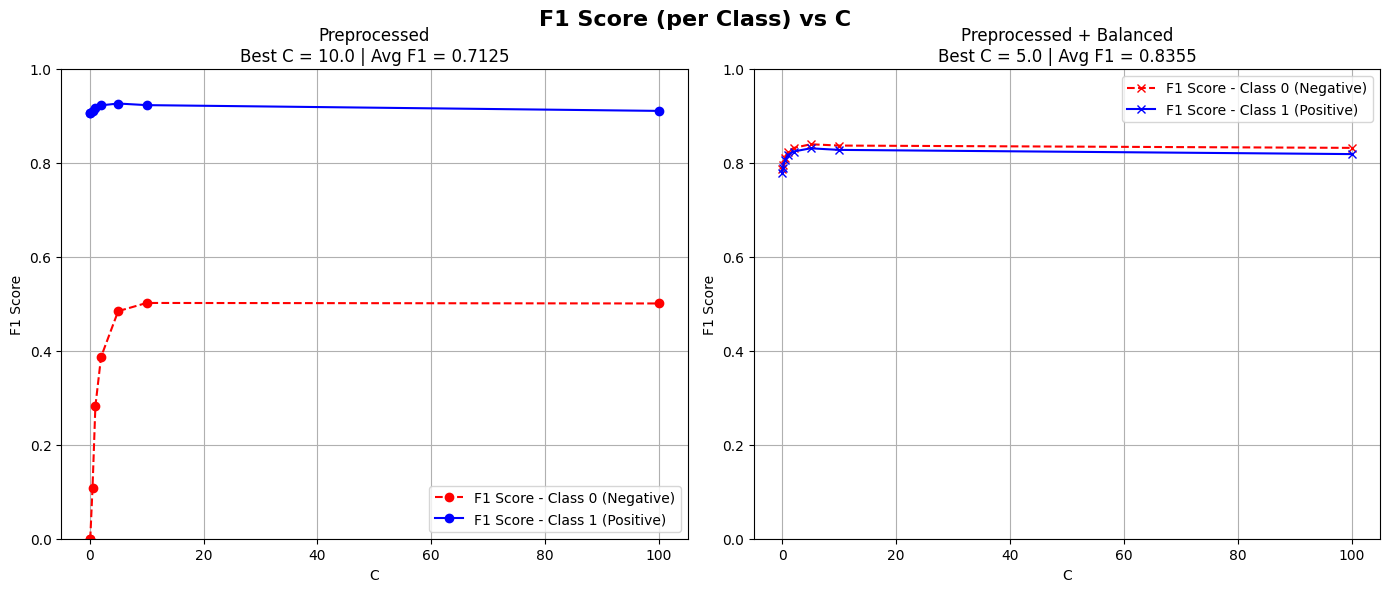


=== Best Results Summary ===
Preprocessed → Best C: 10.0 | Avg F1: 0.7125
Preprocessed + Balanced → Best C: 5.0 | Avg F1: 0.8355


In [299]:
test_model_with_param_two_datasets(
    'LABR_Pre.csv',
    'LABR_Pre_Blc.csv',
    LogisticRegression,
    'C',
    [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 100.0],
    labels=("Preprocessed", "Preprocessed + Balanced"),
    sample_percentage=SP4
)

### Result 2 (Best Hyperparameter)

##### Best Hyperparameters

In [300]:
HP_Normal = {'C': 100}
HP_Preprocessed = {'C': 10}
HP_Balanced = {'C': 5}

#### Normal

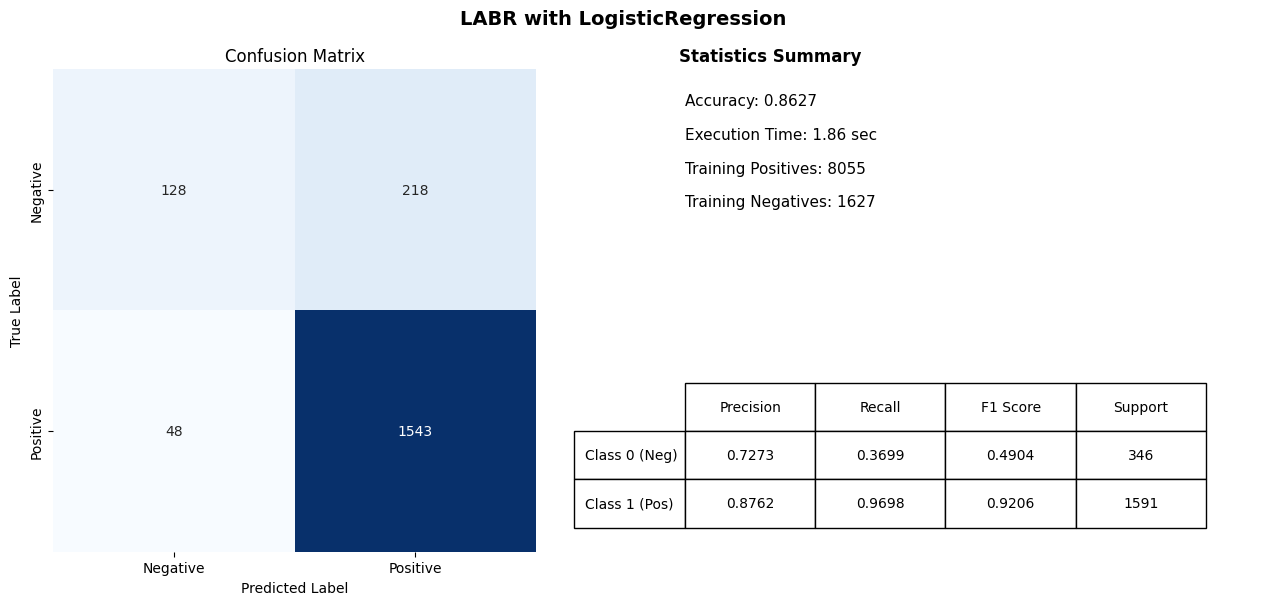

In [301]:
res28 = run_model_on_csv(
    'LABR.csv',
    model_class=LogisticRegression,
    model_name='LogisticRegression',
    dataset_name='LABR',
    sample_percentage=SP4,
    model_params=HP_Normal,
)

#### Preprocessed

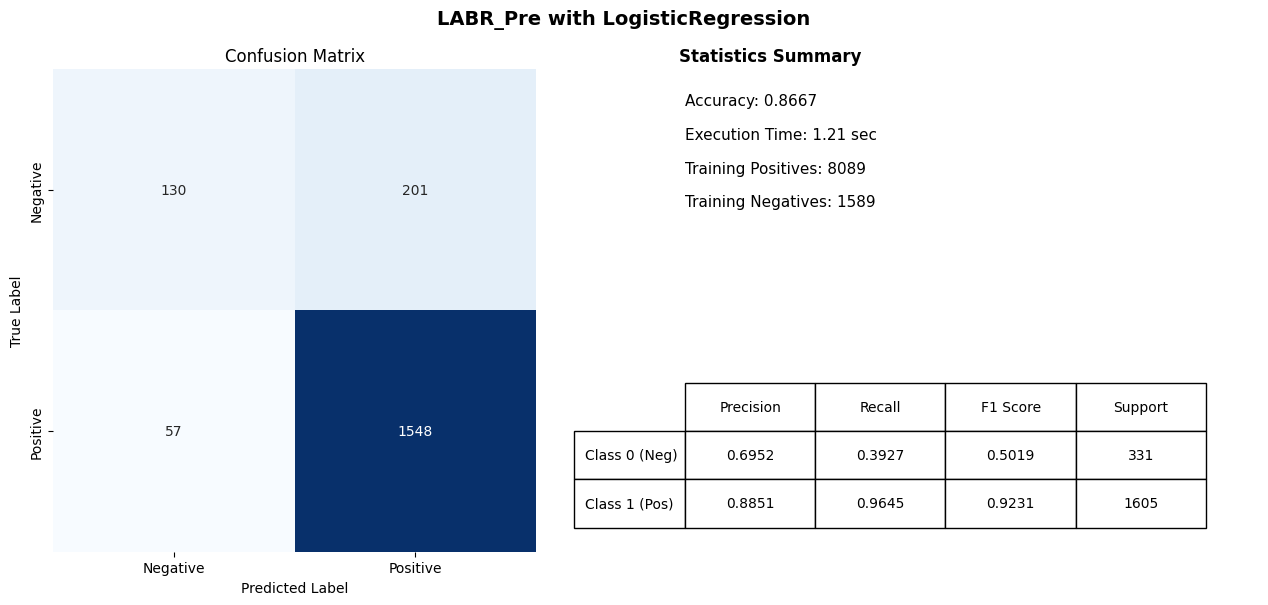

In [302]:
res29 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=LogisticRegression,
    model_name='LogisticRegression',
    dataset_name='LABR_Pre',
    sample_percentage=SP4,
    model_params=HP_Preprocessed,
)

#### Preprocessed + Balanced

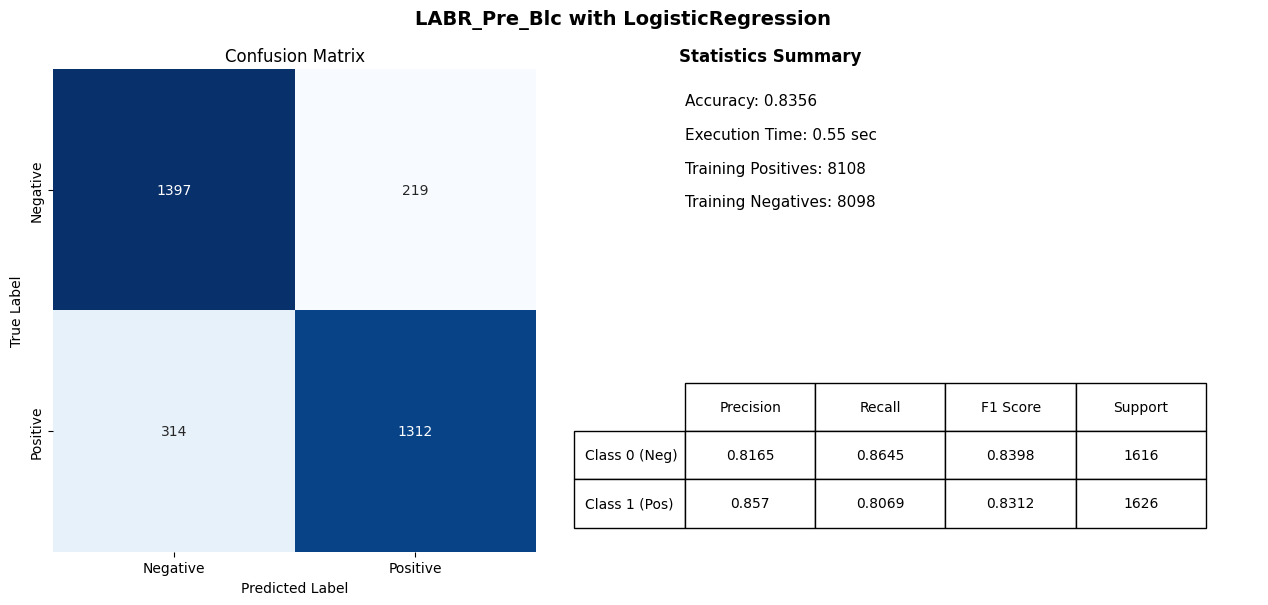

In [303]:
res30 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=LogisticRegression,
    model_name='LogisticRegression',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP4,
    model_params=HP_Balanced,
)

## **RandomForest**

### Result 1 (Default Hyperparameter)

#### Normal

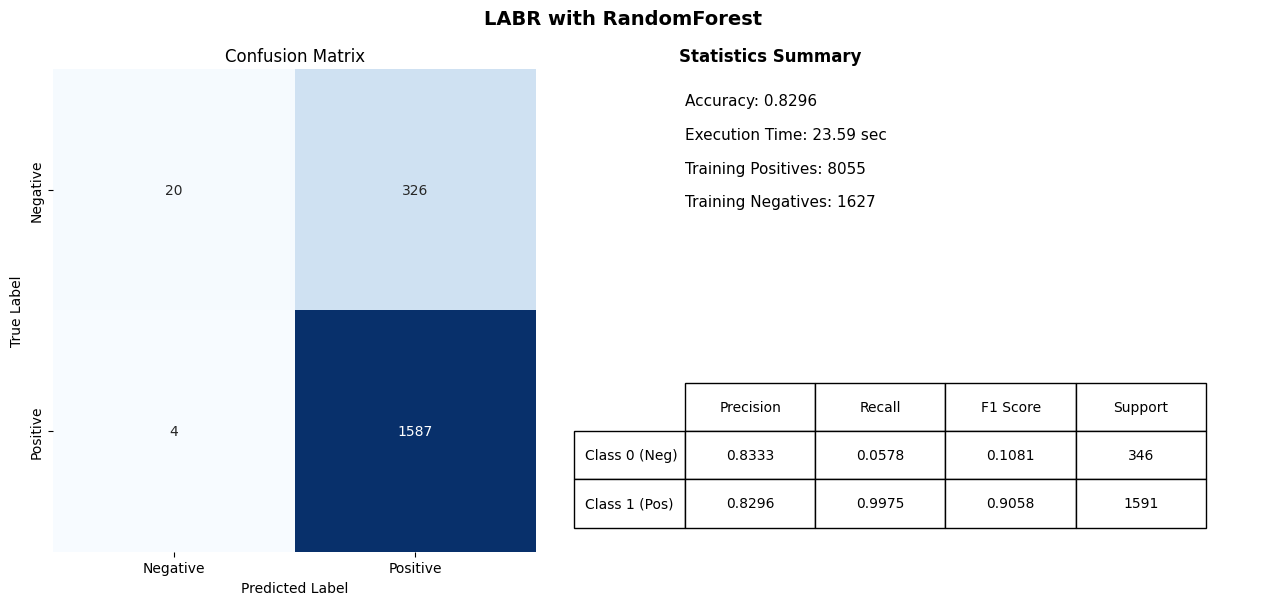

In [304]:
res31 = run_model_on_csv(
    'LABR.csv',
    model_class=RandomForestClassifier,
    model_name='RandomForest',
    dataset_name='LABR',
    sample_percentage=SP5,
)

#### Preprocessed

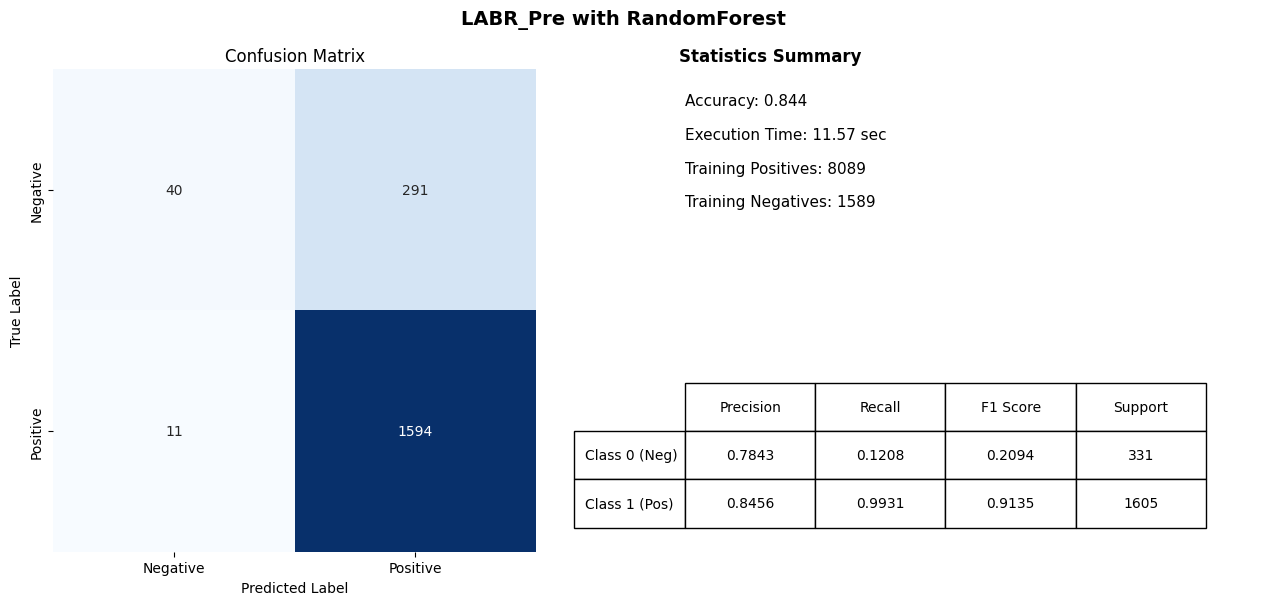

In [305]:
res32 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=RandomForestClassifier,
    model_name='RandomForest',
    dataset_name='LABR_Pre',
    sample_percentage=SP5,
)

#### Preprocessed + Balanced

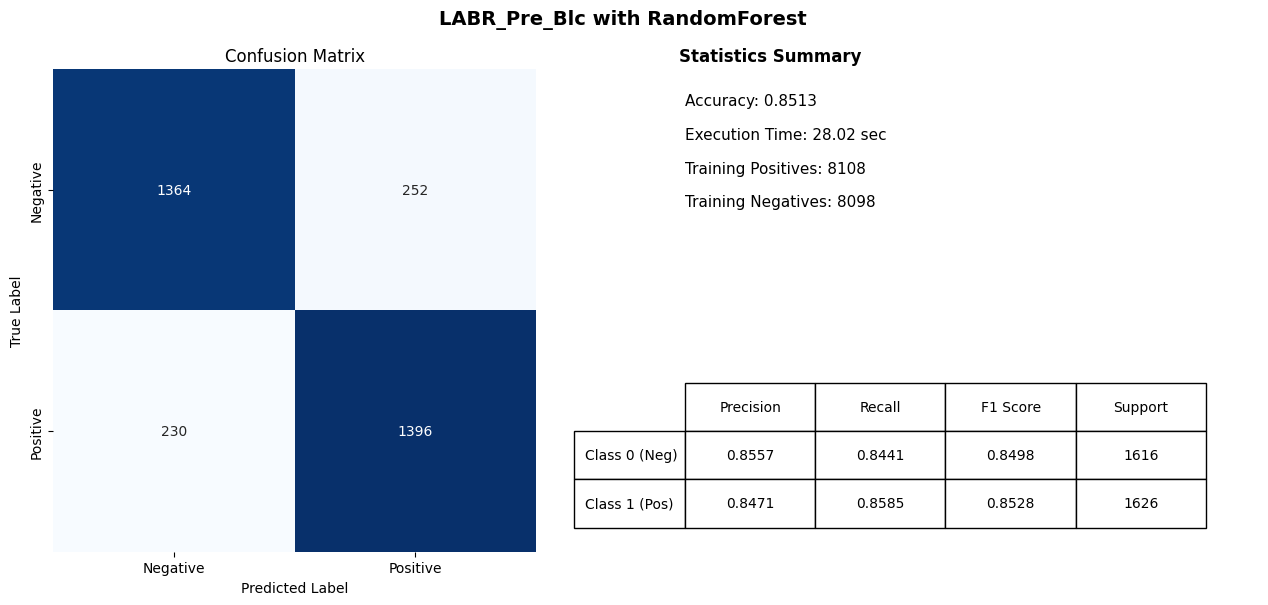

In [306]:
res33 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=RandomForestClassifier,
    model_name='RandomForest',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP5,
)

### Hyperparameter / F1

#### n_estimators Test — Normal / Preprocessed

LABR.csv | n_estimators: 50 | F1[0]: 0.1164 | F1[1]: 0.9045 | Avg F1: 0.5104 | Time: 11.8668s
LABR.csv | n_estimators: 100 | F1[0]: 0.0981 | F1[1]: 0.9056 | Avg F1: 0.5019 | Time: 23.43s
LABR.csv | n_estimators: 200 | F1[0]: 0.0924 | F1[1]: 0.9047 | Avg F1: 0.4986 | Time: 71.861s
LABR.csv | n_estimators: 300 | F1[0]: 0.0877 | F1[1]: 0.9051 | Avg F1: 0.4964 | Time: 69.9563s
LABR.csv | n_estimators: 400 | F1[0]: 0.0929 | F1[1]: 0.9054 | Avg F1: 0.4991 | Time: 94.6303s
LABR.csv | n_estimators: 500 | F1[0]: 0.1084 | F1[1]: 0.9061 | Avg F1: 0.5073 | Time: 120.4549s
LABR_Pre.csv | n_estimators: 50 | F1[0]: 0.2094 | F1[1]: 0.9135 | Avg F1: 0.5614 | Time: 6.3718s
LABR_Pre.csv | n_estimators: 100 | F1[0]: 0.2058 | F1[1]: 0.9138 | Avg F1: 0.5598 | Time: 11.7973s
LABR_Pre.csv | n_estimators: 200 | F1[0]: 0.192 | F1[1]: 0.9134 | Avg F1: 0.5527 | Time: 23.3787s
LABR_Pre.csv | n_estimators: 300 | F1[0]: 0.1973 | F1[1]: 0.9139 | Avg F1: 0.5556 | Time: 34.6035s
LABR_Pre.csv | n_estimators: 400 | F1[0]

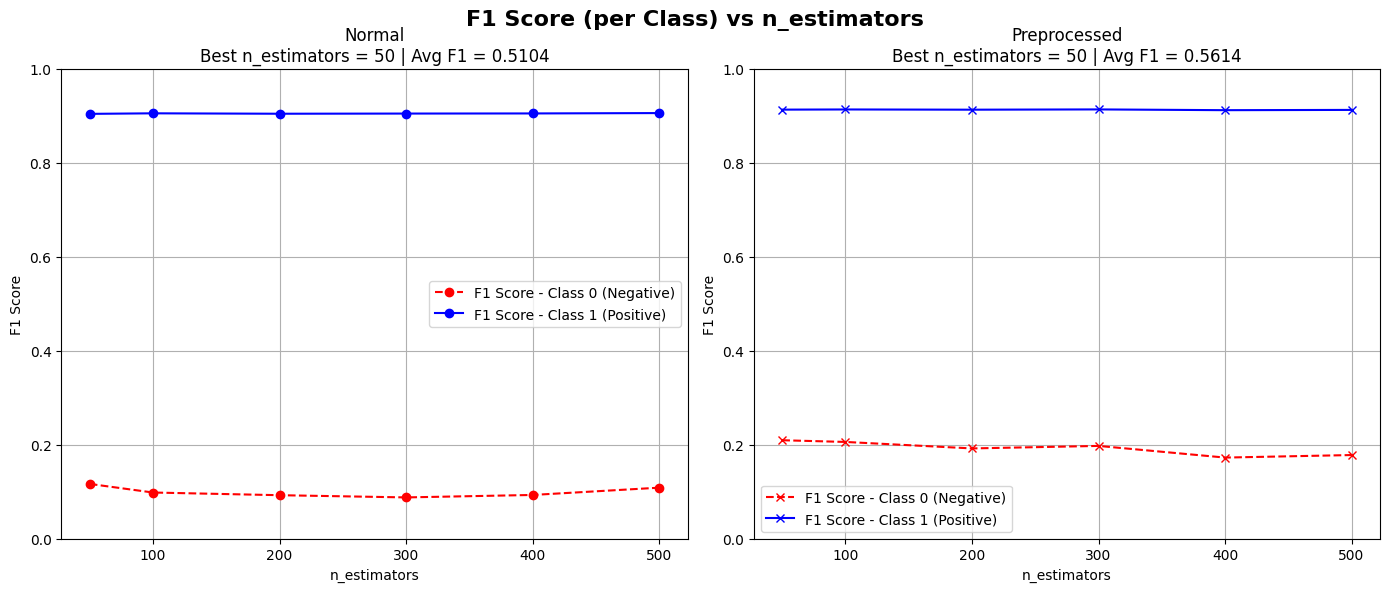


=== Best Results Summary ===
Normal → Best n_estimators: 50 | Avg F1: 0.5104
Preprocessed → Best n_estimators: 50 | Avg F1: 0.5614


In [307]:
test_model_with_param_two_datasets(
    'LABR.csv',
    'LABR_Pre.csv',
    RandomForestClassifier,
    'n_estimators',
    [50, 100, 200, 300, 400, 500],
    labels=("Normal", "Preprocessed"),
    sample_percentage=SP5
)

#### n_estimators Test — Preprocessed / Preprocessed + Balanced

LABR_Pre.csv | n_estimators: 50 | F1[0]: 0.192 | F1[1]: 0.9134 | Avg F1: 0.5527 | Time: 5.653s
LABR_Pre.csv | n_estimators: 100 | F1[0]: 0.2122 | F1[1]: 0.915 | Avg F1: 0.5636 | Time: 12.8179s
LABR_Pre.csv | n_estimators: 200 | F1[0]: 0.1779 | F1[1]: 0.9129 | Avg F1: 0.5454 | Time: 23.9973s
LABR_Pre.csv | n_estimators: 300 | F1[0]: 0.1823 | F1[1]: 0.9128 | Avg F1: 0.5476 | Time: 35.7167s
LABR_Pre.csv | n_estimators: 400 | F1[0]: 0.1734 | F1[1]: 0.9129 | Avg F1: 0.5432 | Time: 47.768s
LABR_Pre.csv | n_estimators: 500 | F1[0]: 0.1833 | F1[1]: 0.9135 | Avg F1: 0.5484 | Time: 58.9239s
LABR_Pre_Blc.csv | n_estimators: 50 | F1[0]: 0.8444 | F1[1]: 0.8428 | Avg F1: 0.8436 | Time: 14.1129s
LABR_Pre_Blc.csv | n_estimators: 100 | F1[0]: 0.8579 | F1[1]: 0.8577 | Avg F1: 0.8578 | Time: 28.6632s
LABR_Pre_Blc.csv | n_estimators: 200 | F1[0]: 0.8577 | F1[1]: 0.861 | Avg F1: 0.8593 | Time: 56.1355s
LABR_Pre_Blc.csv | n_estimators: 300 | F1[0]: 0.8579 | F1[1]: 0.8595 | Avg F1: 0.8587 | Time: 84.6599s
LA

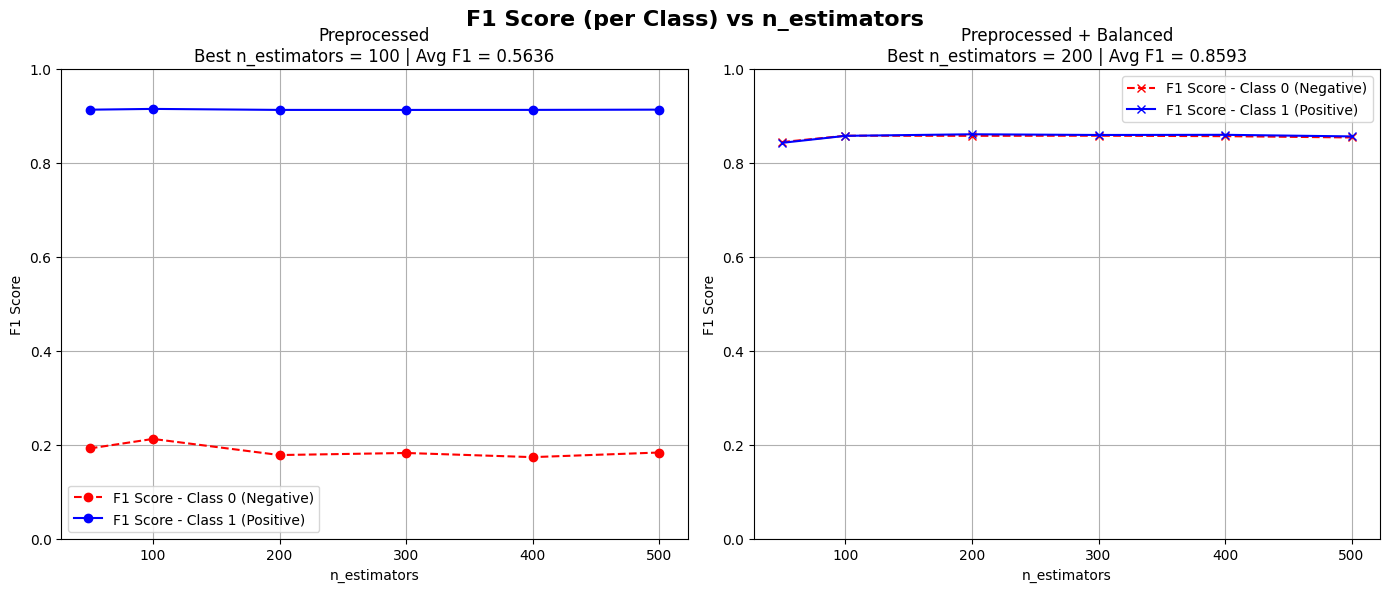


=== Best Results Summary ===
Preprocessed → Best n_estimators: 100 | Avg F1: 0.5636
Preprocessed + Balanced → Best n_estimators: 200 | Avg F1: 0.8593


In [308]:
test_model_with_param_two_datasets(
    'LABR_Pre.csv',
    'LABR_Pre_Blc.csv',
    RandomForestClassifier,
    'n_estimators',
    [50, 100, 200, 300, 400, 500],
    labels=("Preprocessed", "Preprocessed + Balanced"),
    sample_percentage=SP5
)

### Result 2 (Best Hyperparameter)

##### Best Hyperparameters

In [309]:
HP_Normal = {'n_estimators': 50}
HP_Preprocessed = {'n_estimators': 50}
HP_Balanced = {'n_estimators': 300}

#### Normal

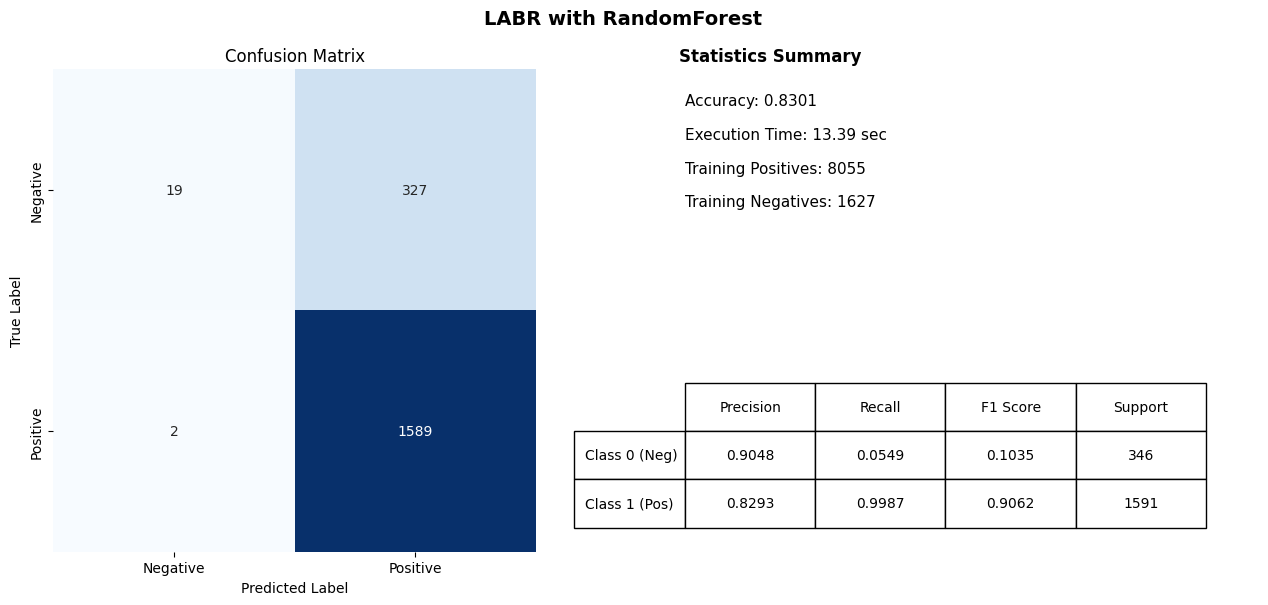

In [310]:
res34 = run_model_on_csv(
    'LABR.csv',
    model_class=RandomForestClassifier,
    model_name='RandomForest',
    dataset_name='LABR',
    sample_percentage=SP5,
    model_params=HP_Normal,
)

#### Preprocessed

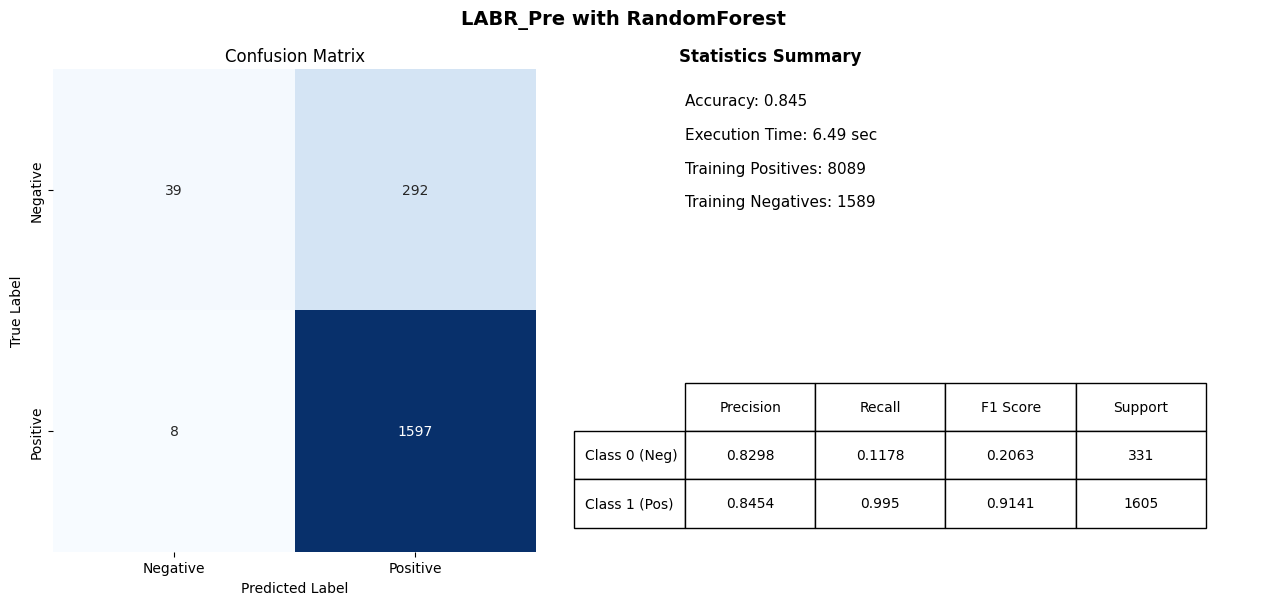

In [311]:
res35 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=RandomForestClassifier,
    model_name='RandomForest',
    dataset_name='LABR_Pre',
    sample_percentage=SP5,
    model_params=HP_Preprocessed,
)

#### Preprocessed + Balanced

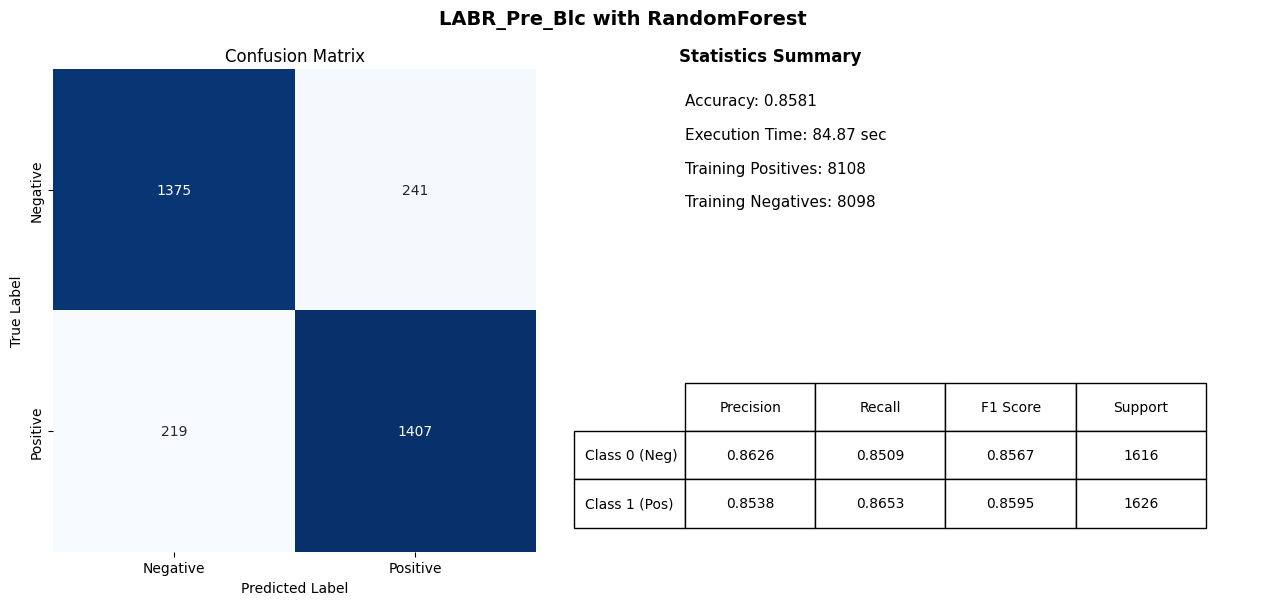

In [312]:
res36 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=RandomForestClassifier,
    model_name='RandomForest',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP5,
    model_params=HP_Balanced,
)

## **KNeighborsClassifier**

### Result 1 (Default Hyperparameter)

#### Normal

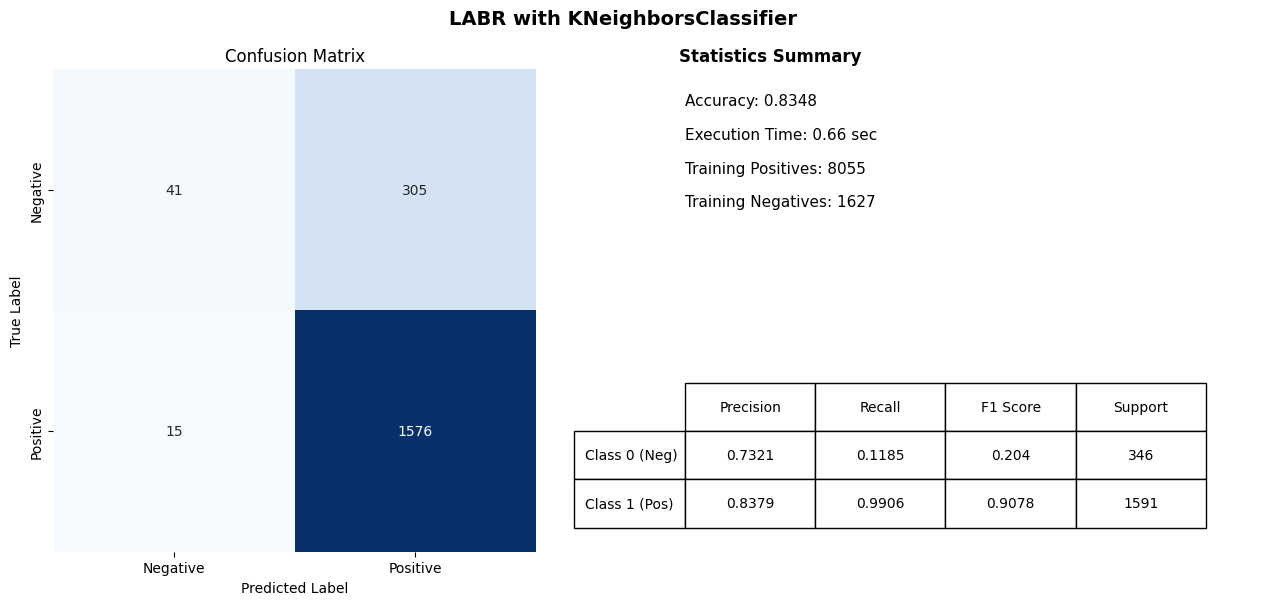

In [313]:
res37 = run_model_on_csv(
    'LABR.csv',
    model_class=KNeighborsClassifier,
    model_name='KNeighborsClassifier',
    dataset_name='LABR',
    sample_percentage=SP6,
)

#### Preprocessed

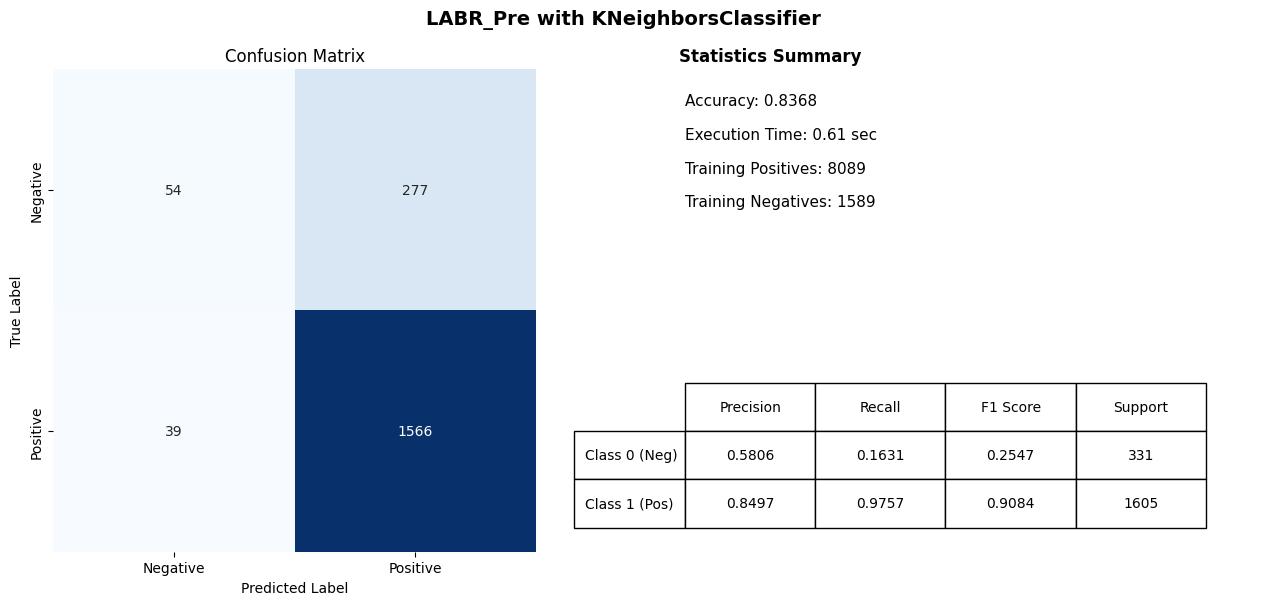

In [314]:
res38 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=KNeighborsClassifier,
    model_name='KNeighborsClassifier',
    dataset_name='LABR_Pre',
    sample_percentage=SP6,
)

#### Preprocessed + Balanced

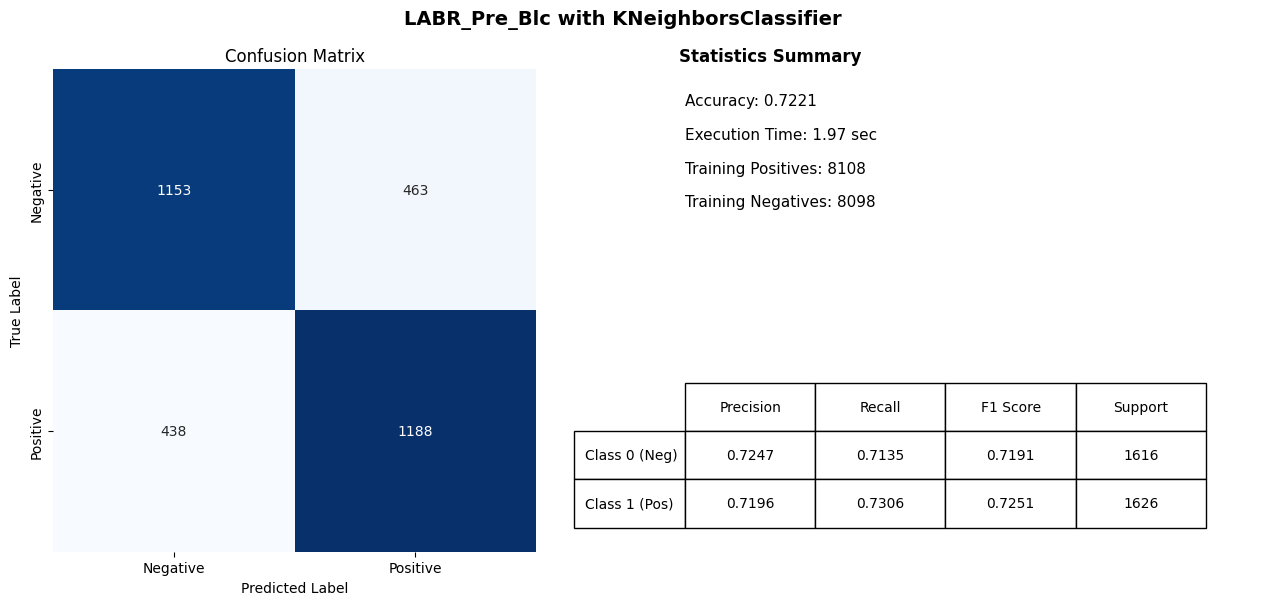

In [315]:
res39 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=KNeighborsClassifier,
    model_name='KNeighborsClassifier',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP6,
)

### Hyperparameter / F1

#### n_neighbors Test — Normal / Preprocessed

LABR.csv | n_neighbors: 3 | F1[0]: 0.2311 | F1[1]: 0.9055 | Avg F1: 0.5683 | Time: 0.753s
LABR.csv | n_neighbors: 5 | F1[0]: 0.204 | F1[1]: 0.9078 | Avg F1: 0.5559 | Time: 0.8248s
LABR.csv | n_neighbors: 7 | F1[0]: 0.1518 | F1[1]: 0.9072 | Avg F1: 0.5295 | Time: 0.8554s
LABR.csv | n_neighbors: 9 | F1[0]: 0.1287 | F1[1]: 0.9072 | Avg F1: 0.5179 | Time: 0.7575s
LABR.csv | n_neighbors: 11 | F1[0]: 0.1138 | F1[1]: 0.9067 | Avg F1: 0.5103 | Time: 0.6542s
LABR.csv | n_neighbors: 13 | F1[0]: 0.1247 | F1[1]: 0.9078 | Avg F1: 0.5163 | Time: 0.6595s
LABR.csv | n_neighbors: 15 | F1[0]: 0.1093 | F1[1]: 0.9071 | Avg F1: 0.5082 | Time: 0.6408s
LABR.csv | n_neighbors: 17 | F1[0]: 0.0986 | F1[1]: 0.9062 | Avg F1: 0.5024 | Time: 0.6517s
LABR.csv | n_neighbors: 19 | F1[0]: 0.0778 | F1[1]: 0.9055 | Avg F1: 0.4916 | Time: 0.6423s
LABR_Pre.csv | n_neighbors: 3 | F1[0]: 0.312 | F1[1]: 0.9054 | Avg F1: 0.6087 | Time: 0.6216s
LABR_Pre.csv | n_neighbors: 5 | F1[0]: 0.2547 | F1[1]: 0.9084 | Avg F1: 0.5815 | Tim

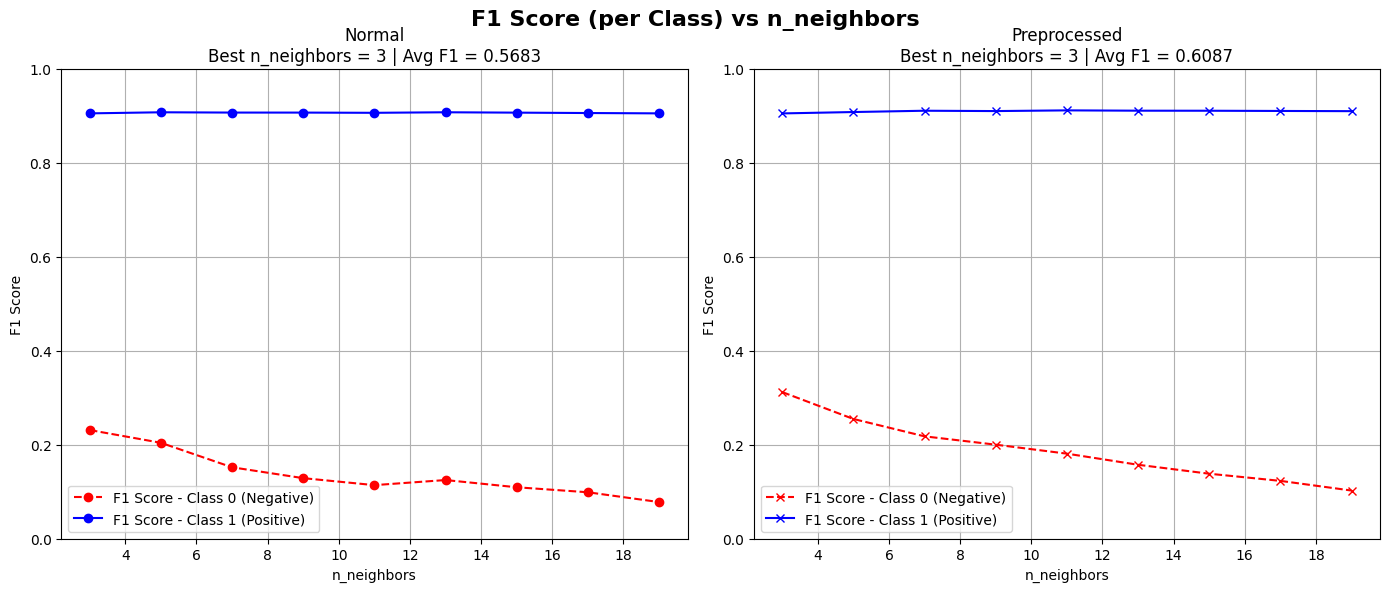


=== Best Results Summary ===
Normal → Best n_neighbors: 3 | Avg F1: 0.5683
Preprocessed → Best n_neighbors: 3 | Avg F1: 0.6087


In [316]:
test_model_with_param_two_datasets(
    'LABR.csv',
    'LABR_Pre.csv',
    KNeighborsClassifier,
    'n_neighbors',
    [3, 5, 7, 9, 11, 13, 15, 17, 19],
    labels=("Normal", "Preprocessed"),
    sample_percentage=SP6
)

#### n_neighbors Test — Preprocessed / Preprocessed + Balanced

LABR_Pre.csv | n_neighbors: 3 | F1[0]: 0.312 | F1[1]: 0.9054 | Avg F1: 0.6087 | Time: 0.8248s
LABR_Pre.csv | n_neighbors: 5 | F1[0]: 0.2547 | F1[1]: 0.9084 | Avg F1: 0.5815 | Time: 0.6649s
LABR_Pre.csv | n_neighbors: 7 | F1[0]: 0.2177 | F1[1]: 0.9111 | Avg F1: 0.5644 | Time: 0.6205s
LABR_Pre.csv | n_neighbors: 9 | F1[0]: 0.2 | F1[1]: 0.9104 | Avg F1: 0.5552 | Time: 0.6261s
LABR_Pre.csv | n_neighbors: 11 | F1[0]: 0.1809 | F1[1]: 0.9119 | Avg F1: 0.5464 | Time: 0.6203s
LABR_Pre.csv | n_neighbors: 13 | F1[0]: 0.1572 | F1[1]: 0.9112 | Avg F1: 0.5342 | Time: 0.6202s
LABR_Pre.csv | n_neighbors: 15 | F1[0]: 0.1381 | F1[1]: 0.9111 | Avg F1: 0.5246 | Time: 0.6287s
LABR_Pre.csv | n_neighbors: 17 | F1[0]: 0.1229 | F1[1]: 0.9106 | Avg F1: 0.5168 | Time: 0.6228s
LABR_Pre.csv | n_neighbors: 19 | F1[0]: 0.1023 | F1[1]: 0.9102 | Avg F1: 0.5062 | Time: 0.628s
LABR_Pre_Blc.csv | n_neighbors: 3 | F1[0]: 0.7249 | F1[1]: 0.7254 | Avg F1: 0.7252 | Time: 1.7627s
LABR_Pre_Blc.csv | n_neighbors: 5 | F1[0]: 0.7

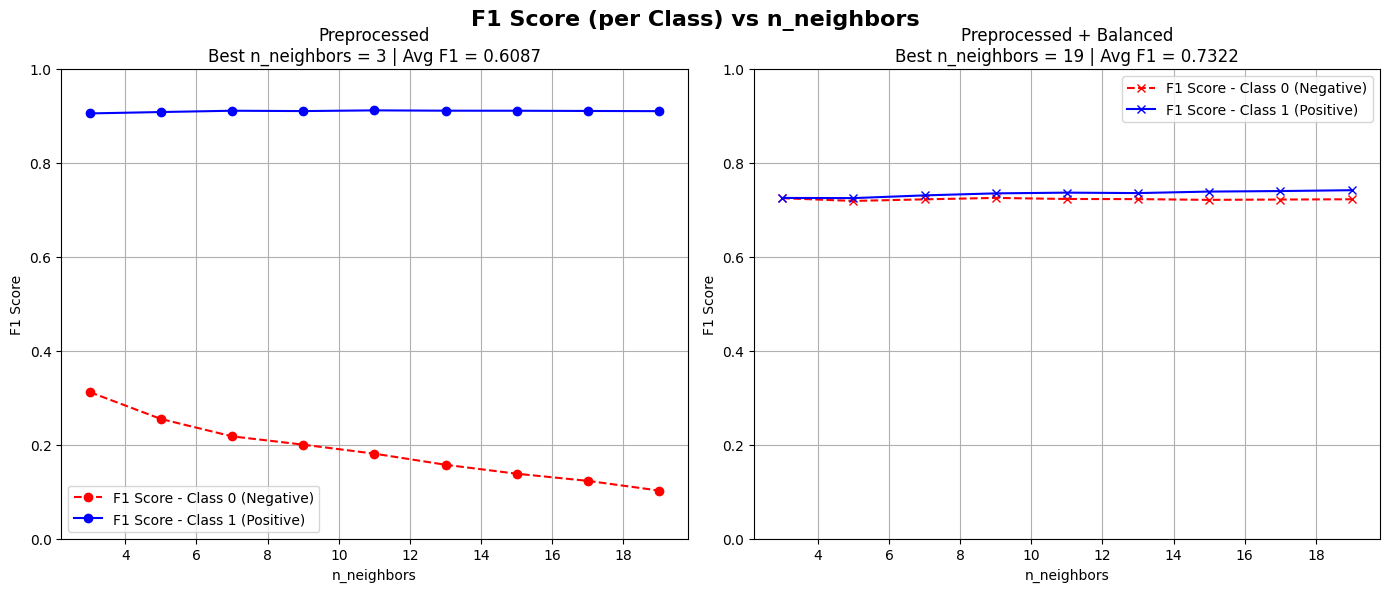


=== Best Results Summary ===
Preprocessed → Best n_neighbors: 3 | Avg F1: 0.6087
Preprocessed + Balanced → Best n_neighbors: 19 | Avg F1: 0.7322


In [317]:
test_model_with_param_two_datasets(
    'LABR_Pre.csv',
    'LABR_Pre_Blc.csv',
    KNeighborsClassifier,
    'n_neighbors',
    [3, 5, 7, 9, 11, 13, 15, 17, 19],
    labels=("Preprocessed", "Preprocessed + Balanced"),
    sample_percentage=SP6
)

### Result 2 (Best Hyperparameter)

##### Best Hyperparameters

In [318]:
HP_Normal = {'n_neighbors': 3}
HP_Preprocessed = {'n_neighbors': 3}
HP_Balanced = {'n_neighbors': 19}

#### Normal

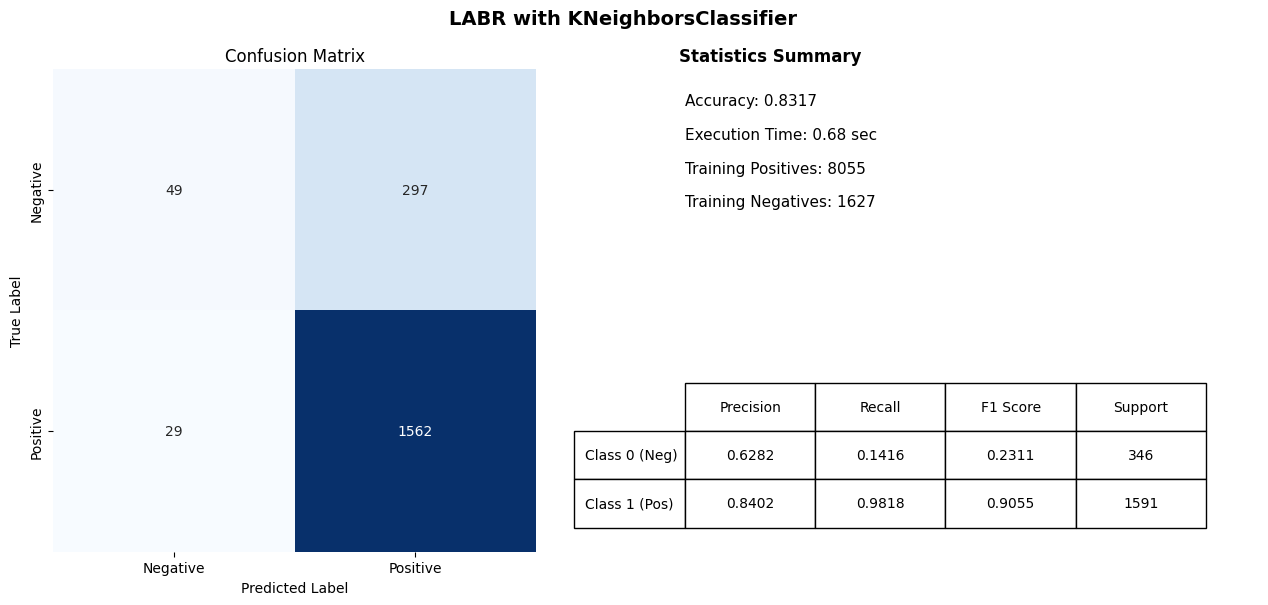

In [319]:
res40 = run_model_on_csv(
    'LABR.csv',
    model_class=KNeighborsClassifier,
    model_name='KNeighborsClassifier',
    dataset_name='LABR',
    sample_percentage=SP6,
    model_params=HP_Normal,
)

#### Preprocessed

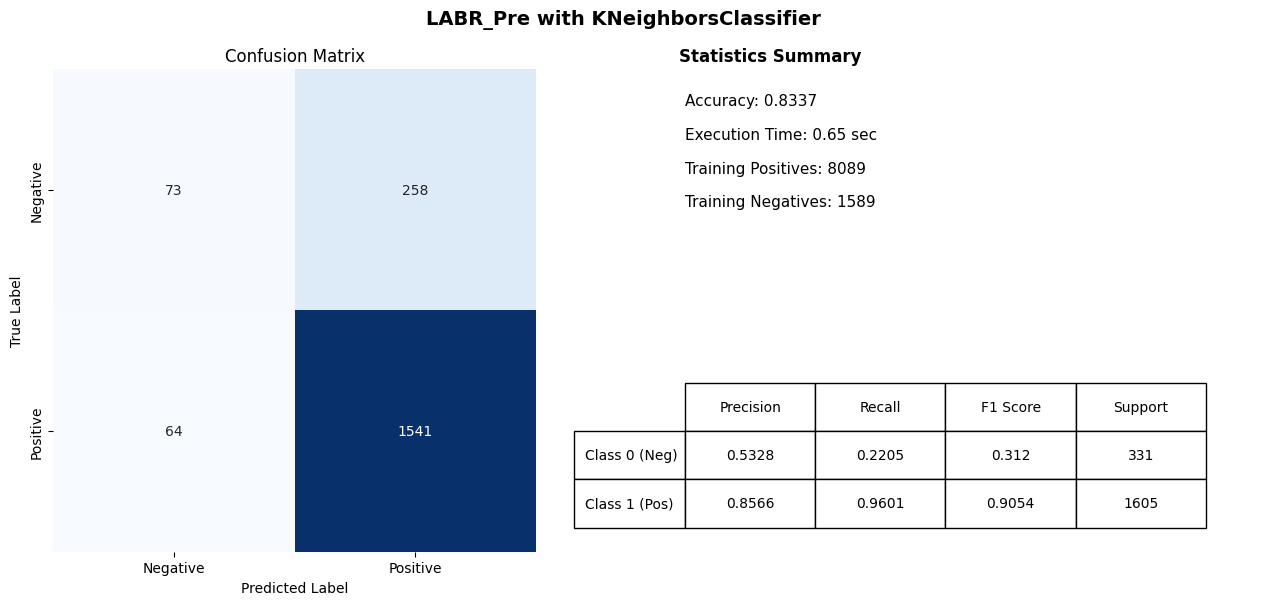

In [320]:
res41 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=KNeighborsClassifier,
    model_name='KNeighborsClassifier',
    dataset_name='LABR_Pre',
    sample_percentage=SP6,
    model_params=HP_Preprocessed,
)

#### Preprocessed + Balanced

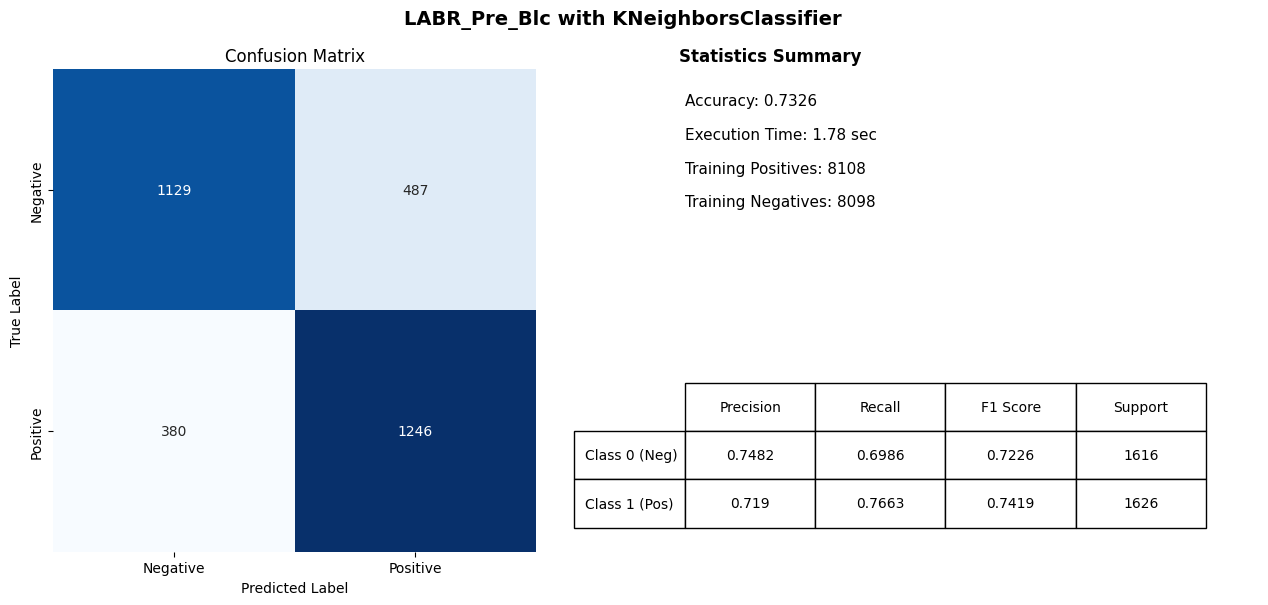

In [321]:
res42 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=KNeighborsClassifier,
    model_name='KNeighborsClassifier',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP6,
    model_params=HP_Balanced,
)

## **AdaBoostClassifier**

### Result 1 (Default Hyperparameter)

#### Normal

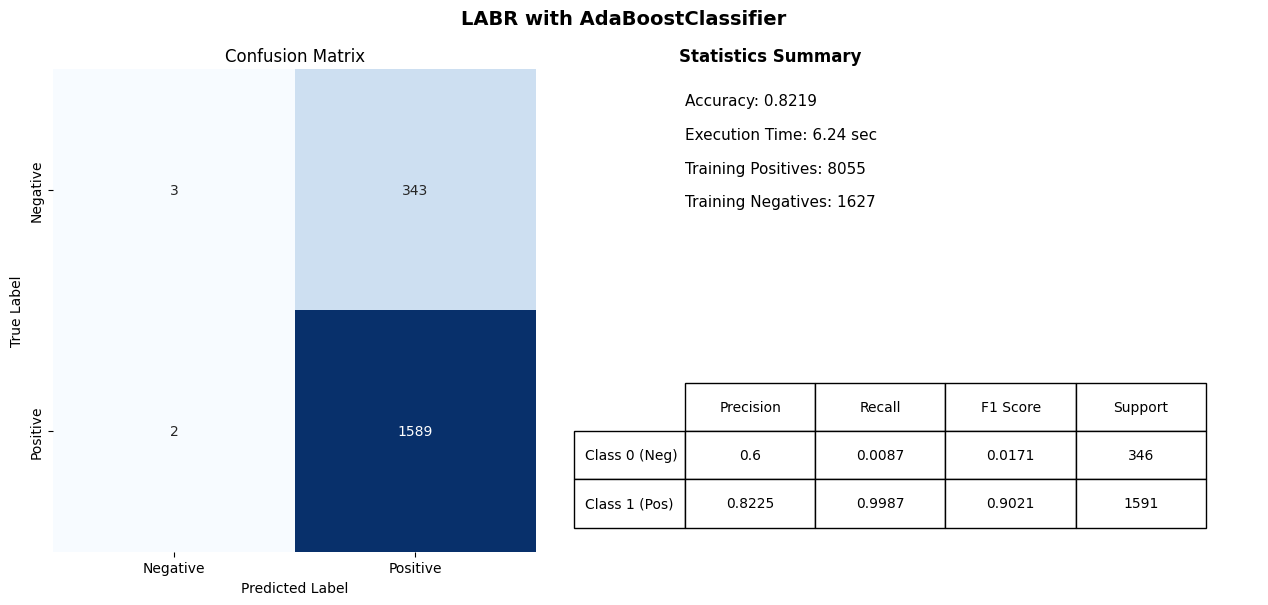

In [322]:
res43 = run_model_on_csv(
    'LABR.csv',
    model_class=AdaBoostClassifier,
    model_name='AdaBoostClassifier',
    dataset_name='LABR',
    sample_percentage=SP7,
)

#### Preprocessed

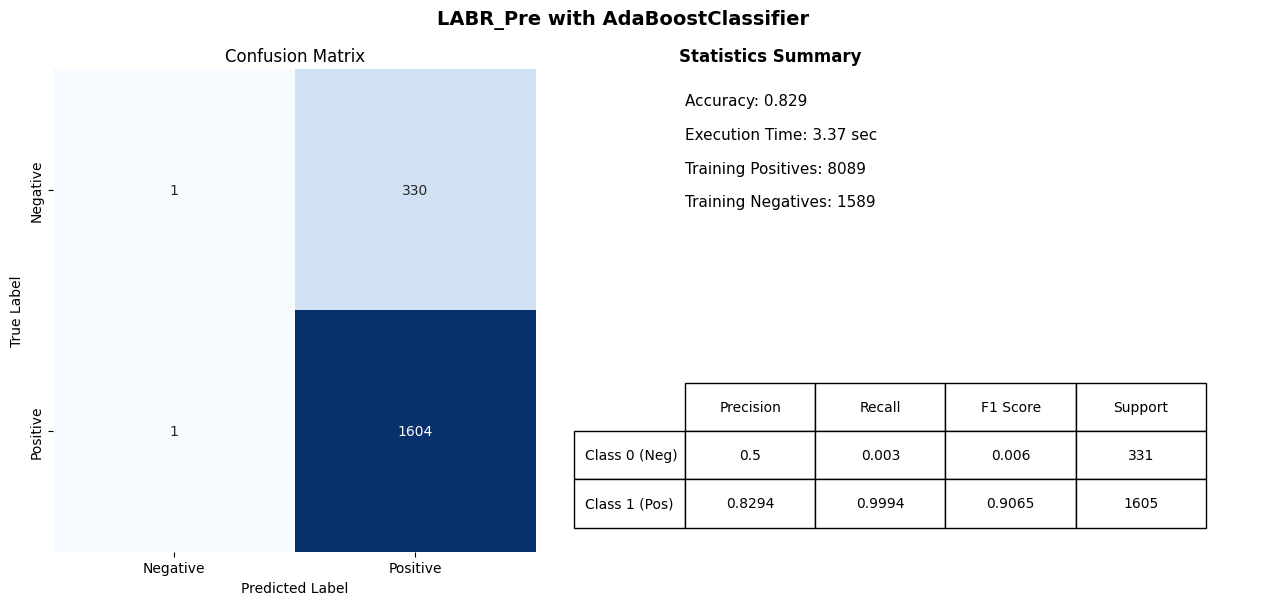

In [323]:
res44 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=AdaBoostClassifier,
    model_name='AdaBoostClassifier',
    dataset_name='LABR_Pre',
    sample_percentage=SP7,
)

#### Preprocessed + Balanced

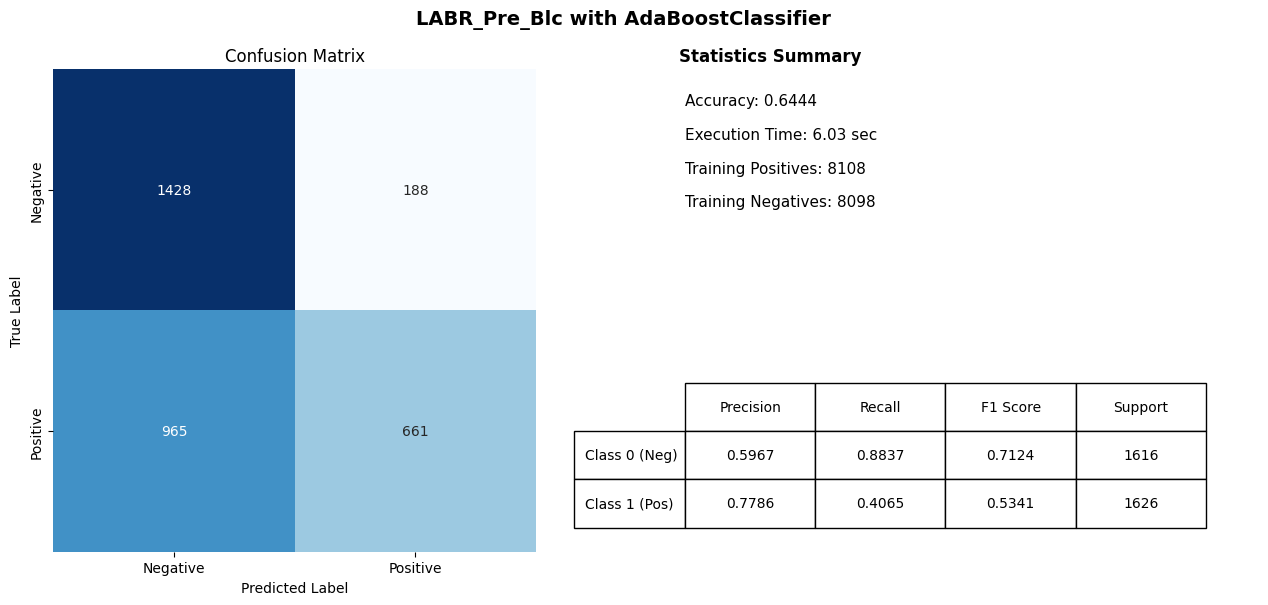

In [324]:
res45 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=AdaBoostClassifier,
    model_name='AdaBoostClassifier',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP7,
)

### Hyperparameter / F1

#### n_estimators Test — Normal / Preprocessed

LABR.csv | n_estimators: 50 | F1[0]: 0.0171 | F1[1]: 0.9021 | Avg F1: 0.4596 | Time: 5.5709s
LABR.csv | n_estimators: 100 | F1[0]: 0.0769 | F1[1]: 0.9043 | Avg F1: 0.4906 | Time: 11.9751s
LABR.csv | n_estimators: 200 | F1[0]: 0.112 | F1[1]: 0.9048 | Avg F1: 0.5084 | Time: 24.4593s
LABR.csv | n_estimators: 300 | F1[0]: 0.1312 | F1[1]: 0.9052 | Avg F1: 0.5182 | Time: 35.46s
LABR.csv | n_estimators: 400 | F1[0]: 0.1503 | F1[1]: 0.906 | Avg F1: 0.5281 | Time: 47.1065s
LABR.csv | n_estimators: 500 | F1[0]: 0.1406 | F1[1]: 0.9054 | Avg F1: 0.523 | Time: 57.9472s
LABR_Pre.csv | n_estimators: 50 | F1[0]: 0.006 | F1[1]: 0.9065 | Avg F1: 0.4562 | Time: 4.0982s
LABR_Pre.csv | n_estimators: 100 | F1[0]: 0.0469 | F1[1]: 0.908 | Avg F1: 0.4774 | Time: 6.7865s
LABR_Pre.csv | n_estimators: 200 | F1[0]: 0.058 | F1[1]: 0.9079 | Avg F1: 0.4829 | Time: 14.2605s
LABR_Pre.csv | n_estimators: 300 | F1[0]: 0.0904 | F1[1]: 0.9085 | Avg F1: 0.4994 | Time: 22.572s
LABR_Pre.csv | n_estimators: 400 | F1[0]: 0.1114

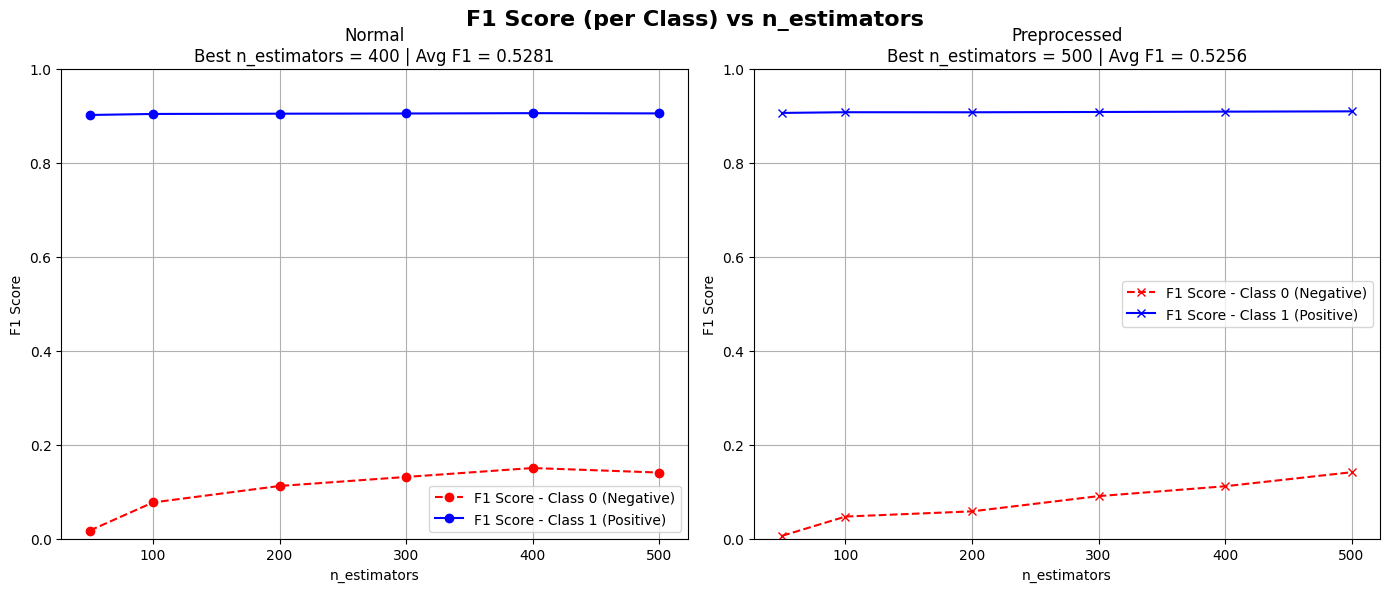


=== Best Results Summary ===
Normal → Best n_estimators: 400 | Avg F1: 0.5281
Preprocessed → Best n_estimators: 500 | Avg F1: 0.5256


In [325]:
test_model_with_param_two_datasets(
    'LABR.csv',
    'LABR_Pre.csv',
    AdaBoostClassifier,
    'n_estimators',
    [50, 100, 200, 300, 400, 500],
    labels=("Normal", "Preprocessed"),
    sample_percentage=SP7
)

#### n_estimators Test — Preprocessed / Preprocessed + Balanced

LABR_Pre.csv | n_estimators: 50 | F1[0]: 0.006 | F1[1]: 0.9065 | Avg F1: 0.4562 | Time: 3.746s
LABR_Pre.csv | n_estimators: 100 | F1[0]: 0.0469 | F1[1]: 0.908 | Avg F1: 0.4774 | Time: 7.1091s
LABR_Pre.csv | n_estimators: 200 | F1[0]: 0.058 | F1[1]: 0.9079 | Avg F1: 0.4829 | Time: 14.2043s
LABR_Pre.csv | n_estimators: 300 | F1[0]: 0.0904 | F1[1]: 0.9085 | Avg F1: 0.4994 | Time: 21.9126s
LABR_Pre.csv | n_estimators: 400 | F1[0]: 0.1114 | F1[1]: 0.9092 | Avg F1: 0.5103 | Time: 28.5735s
LABR_Pre.csv | n_estimators: 500 | F1[0]: 0.1413 | F1[1]: 0.9098 | Avg F1: 0.5256 | Time: 36.0866s
LABR_Pre_Blc.csv | n_estimators: 50 | F1[0]: 0.7124 | F1[1]: 0.5341 | Avg F1: 0.6233 | Time: 6.0348s
LABR_Pre_Blc.csv | n_estimators: 100 | F1[0]: 0.7063 | F1[1]: 0.6184 | Avg F1: 0.6624 | Time: 12.0144s
LABR_Pre_Blc.csv | n_estimators: 200 | F1[0]: 0.7167 | F1[1]: 0.6432 | Avg F1: 0.6799 | Time: 22.2496s
LABR_Pre_Blc.csv | n_estimators: 300 | F1[0]: 0.6893 | F1[1]: 0.7104 | Avg F1: 0.6998 | Time: 34.0753s
LAB

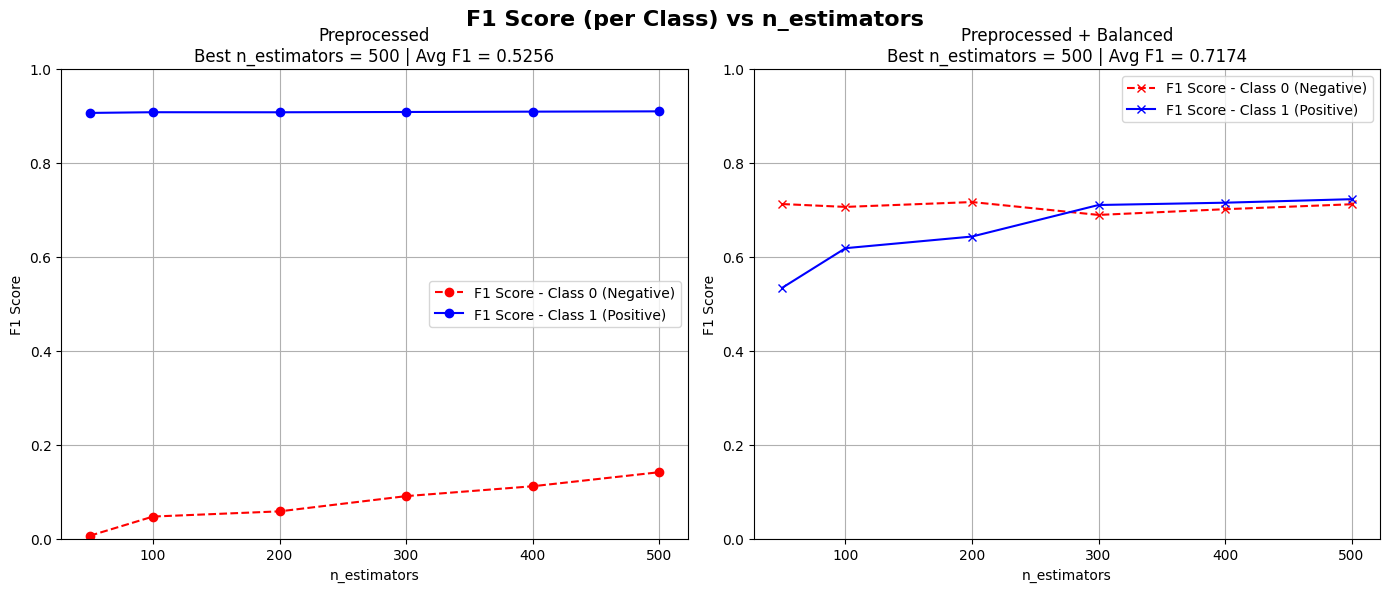


=== Best Results Summary ===
Preprocessed → Best n_estimators: 500 | Avg F1: 0.5256
Preprocessed + Balanced → Best n_estimators: 500 | Avg F1: 0.7174


In [326]:
test_model_with_param_two_datasets(
    'LABR_Pre.csv',
    'LABR_Pre_Blc.csv',
    AdaBoostClassifier,
    'n_estimators',
    [50, 100, 200, 300, 400, 500],
    labels=("Preprocessed", "Preprocessed + Balanced"),
    sample_percentage=SP7
)

### Result 2 (Best Hyperparameter)

##### Best Hyperparameters

In [327]:
HP_Normal = {'n_estimators': 400}
HP_Preprocessed = {'n_estimators': 500}
HP_Balanced = {'n_estimators': 500}

#### Normal

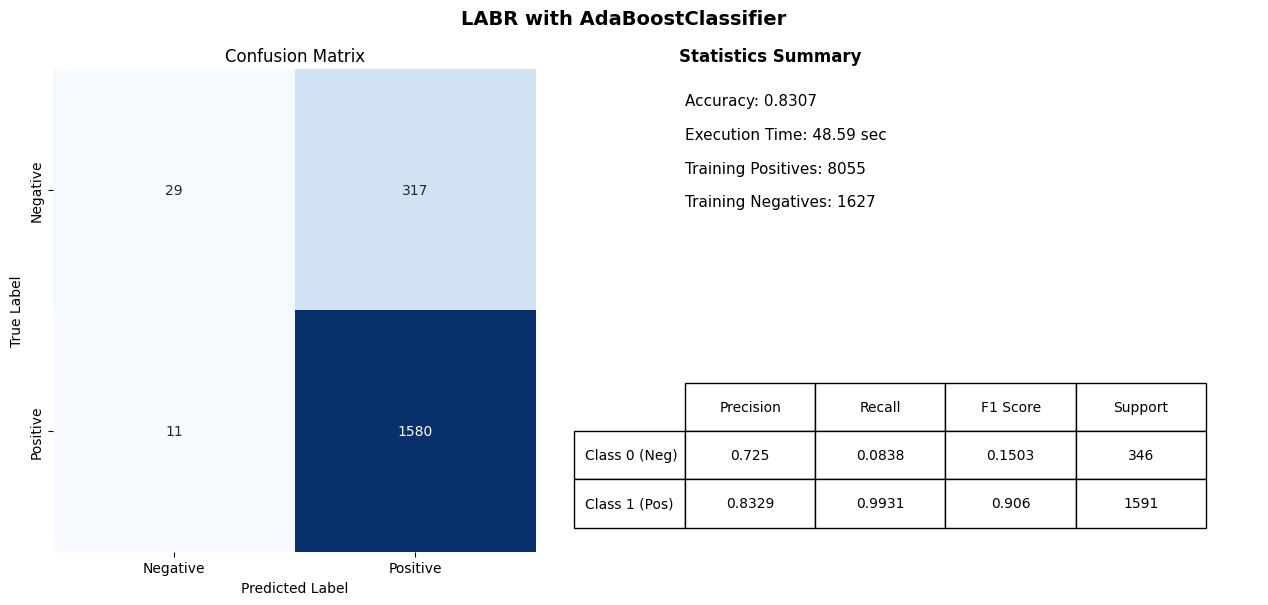

In [328]:
res46 = run_model_on_csv(
    'LABR.csv',
    model_class=AdaBoostClassifier,
    model_name='AdaBoostClassifier',
    dataset_name='LABR',
    sample_percentage=SP7,
    model_params=HP_Normal,
)

#### Preprocessed

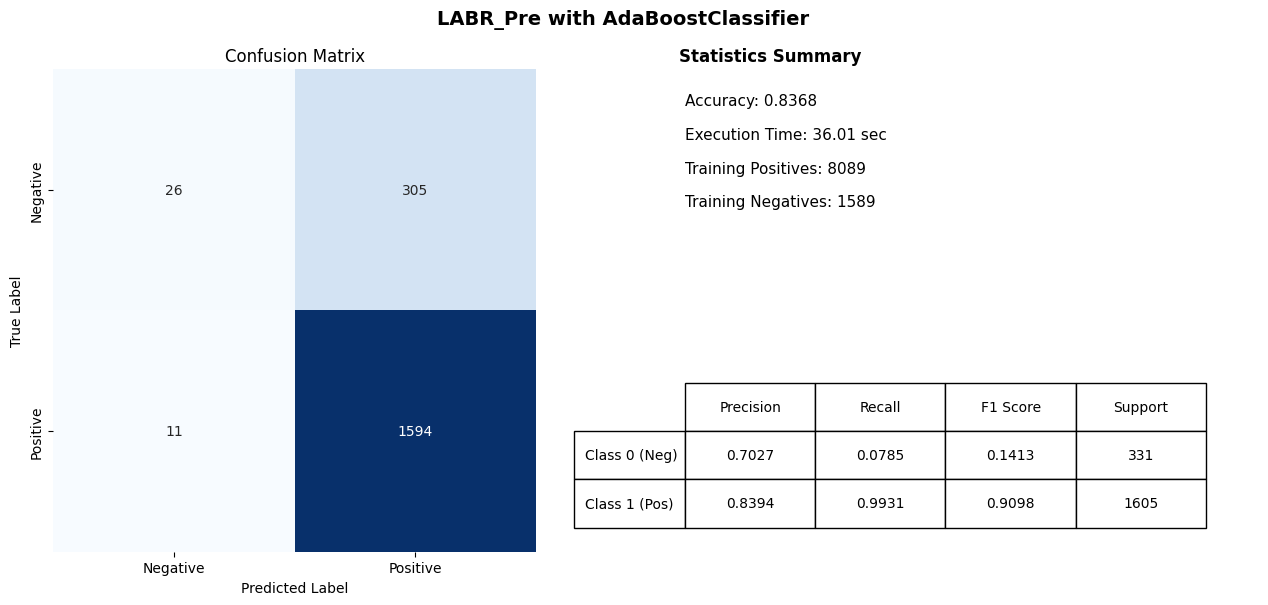

In [329]:
res47 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=AdaBoostClassifier,
    model_name='AdaBoostClassifier',
    dataset_name='LABR_Pre',
    sample_percentage=SP7,
    model_params=HP_Preprocessed,
)

#### Preprocessed + Balanced

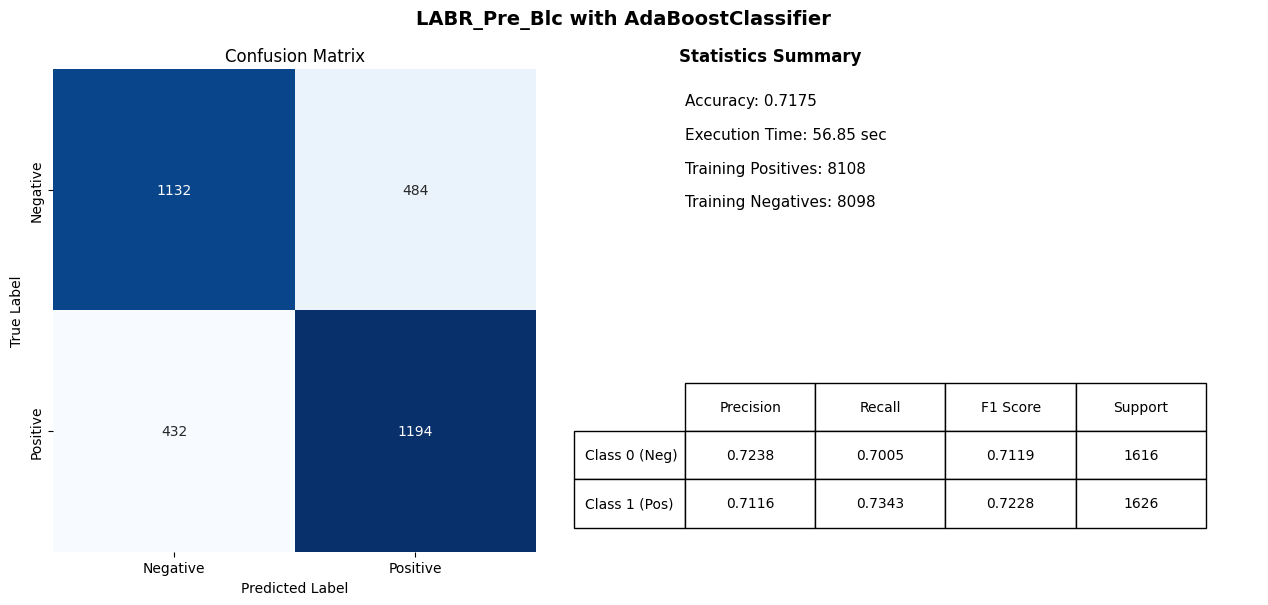

In [330]:
res48 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=AdaBoostClassifier,
    model_name='AdaBoostClassifier',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP7,
    model_params=HP_Balanced,
)

## **SVM (NuSVC)**

### Result 1 (Default Hyperparameter)

#### Normal

In [ ]:
res19 = run_model_on_csv(
    'LABR.csv',
    model_class=NuSVC,
    model_name='SVM (NuSVC)',
    dataset_name='LABR',
    sample_percentage=SP8,
)

#### Preprocessed

In [ ]:
res20 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=NuSVC,
    model_name='SVM (NuSVC)',
    dataset_name='LABR_Pre',
    sample_percentage=SP8,
)

#### Preprocessed + Balanced

In [ ]:
res21 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=NuSVC,
    model_name='SVM (NuSVC)',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP8,
)

### Hyperparameter / F1

#### Nu Test — Normal / Preprocessed

In [ ]:
test_model_with_param_two_datasets(
    'LABR.csv',
    'LABR_Pre.csv',
    NuSVC,
    'nu',
    [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    labels=("Normal", "Preprocessed"),
    sample_percentage=SP8
)

#### Nu Test — Preprocessed / Preprocessed + Balanced

In [ ]:
test_model_with_param_two_datasets(
    'LABR_Pre.csv',
    'LABR_Pre_Blc.csv',
    NuSVC,
    'nu',
    [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    labels=("Preprocessed", "Preprocessed + Balanced"),
    sample_percentage=SP8
)

### Result 2 (Best Hyperparameter)

##### Best Hyperparameters

In [ ]:
HP_Normal = {'nu': 0.1}
HP_Preprocessed = {'nu': 0.05}
HP_Balanced = {'nu': 0.2}

#### Normal

In [ ]:
res22 = run_model_on_csv(
    'LABR.csv',
    model_class=NuSVC,
    model_name='SVM (NuSVC)',
    dataset_name='LABR',
    sample_percentage=SP8,
    model_params=HP_Normal,
)

#### Preprocessed

In [ ]:
res23 = run_model_on_csv(
    'LABR_Pre.csv',
    model_class=NuSVC,
    model_name='SVM (NuSVC)',
    dataset_name='LABR_Pre',
    sample_percentage=SP8,
    model_params=HP_Preprocessed,
)

#### Preprocessed + Balanced

In [ ]:
res24 = run_model_on_csv(
    'LABR_Pre_Blc.csv',
    model_class=NuSVC,
    model_name='SVM (NuSVC)',
    dataset_name='LABR_Pre_Blc',
    sample_percentage=SP8,
    model_params=HP_Balanced,
)